> Universidad Galileo
>
> Investigación de Operaciones
>
> Postgrado en Análisis y Predicción de Datos
>
> Curso: Product Development
>
> Catedrático: Ing. Preng Biba Solares
>
> Auxiliar: Ing. Jorge Alberto Osoy Barrera

> Proyecto #2 Exploratory Data Analysis
>

> Jennifer Tobar
> 18004720

> Andrea Castellanos
> 20003533

> Melvin Garcia

>
> 14135005
>
> Guatemala, 2 de noviembre 2025

### Contexto

Para la entrega 2 se solicita completar el EDA siguiendo los pasos a continuación:

--------------------

### 1. Crear una carpeta para desarrollar el proyecto con las siguientes consideraciones

> ##### a. Descargar la plantilla de cookiecuiter para definir la estructura de proyecto.

Link de referencia: https://github.com/drivendataorg/cookiecutter-data-science

> ##### b. Crear el notebook 01_exploratory_data_analysis.ipynb

Dentro de la estructura del proyecto en la carpeta notebooks se ha creado el archivo ipynb con el nombre indicado

> ##### c. Crear un repositorio local con git

Se crea un repositorio usando git

> ##### d. Agregar la configuración que considere necesaria en el archivo .gitignore

> ##### f. Cada miembro del equipo deberá mostrar un screenshot donde hace un pull del repositorio para trabajar de forma local en su computadora.

Se guadaron las imagenes en data/images

> ##### Referencias: Store Sales Forecasting Dataset (https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset/data)

--------------------

### 2. Comprensión inicial del dataset

> ##### Instalación e importación de librerias

In [1]:
# Paquetes requeridos
# pandas, numpy, matplotlib, scikit-learn y statsmodels

# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Librerias Paso 9
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

> ##### a. Cargar el dataset y visualizar las primeras filas

In [2]:
# Cargar el dataset
paso2_raw_data_stores_sales = pd.read_csv('../data/raw/stores_sales_forecasting_updated_v3.1.csv', 
                 sep=';',
                 encoding='utf-8')

# Inspección visual
paso2_raw_data_stores_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,849,CA-2017-107503,1/01/2017,6/01/2017,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,4010,CA-2017-144463,1/01/2017,5/01/2017,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,8071,CA-2017-151750,1/01/2017,5/01/2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
3,8072,CA-2017-151750,1/01/2017,5/01/2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
4,867,CA-2014-149020,10/01/2014,15/01/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954


> ##### b. Mostrar el tamaño del dataset (número de filas y columnas)

In [3]:
# Información general del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Número total de filas: {paso2_raw_data_stores_sales.shape[0]:,}")
print(f"Número total de columnas: {paso2_raw_data_stores_sales.shape[1]}")
print(f"Nombres de las columnas: {list(paso2_raw_data_stores_sales.columns)}")

=== INFORMACIÓN GENERAL DEL DATASET ===
Número total de filas: 2,121
Número total de columnas: 22
Nombres de las columnas: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Branch', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


> ##### c. Describir brevemente que representa cada columna

Row ID: Identificador único de cada fila en el dataset

Order ID: Identificador único de cada orden de compra

Order Date: Fecha en que se realizó la orden

Ship Date: Fecha en que se envió la orden

Ship Mode: Método de envío utilizado (Standard Class, Second Class, First Class, Same Day)

Customer ID: Identificador único del cliente

Customer Name: Nombre completo del cliente

Segment: Segmento al que pertenece el cliente (Consumer, Corporate, Home Office)

Country: País donde se realizó la venta

City: Ciudad donde se realizó la venta

State: Estado donde se realizó la venta

Branch: Sucursal que procesó la venta

Postal Code: Código postal de la ubicación de venta

Region: Región geográfica (East, West, Central, South)

Product ID: Identificador único del producto

Category: Categoría principal del producto

Sub-Category: Subcategoría del producto

Product Name: Nombre descriptivo del producto

Sales: Monto de ventas en dólares

Quantity: Cantidad de unidades vendidas

Discount: Descuento aplicado

Profit: Utilidad o ganancia obtenida de la venta


> ##### d. Identificar el rango temporal de los datos (fecha mínima y fecha máxima)

In [20]:
# Convertir las columnas de fecha a tipo datetime
# Especificar el formato DD/MM/YYYY para la conversión correcta
paso2_raw_data_stores_sales['Order Date'] = pd.to_datetime(paso2_raw_data_stores_sales['Order Date'], format='%d/%m/%Y', dayfirst=True)
paso2_raw_data_stores_sales['Ship Date'] = pd.to_datetime(paso2_raw_data_stores_sales['Ship Date'], format='%d/%m/%Y', dayfirst=True)

print("=== RANGO TEMPORAL ===")

# Obtener el total de registros, filas
total_registros = len(paso2_raw_data_stores_sales)

# Obtener la fecha mínima y máxima de las órdenes
fecha_minima = paso2_raw_data_stores_sales['Order Date'].min()
fecha_maxima = paso2_raw_data_stores_sales['Order Date'].max()

# Verificar también el rango de fechas de envío
print(f"Fecha de envío más antigua: {paso2_raw_data_stores_sales['Ship Date'].min().strftime('%d/%m/%Y')}")
print(f"Fecha de envío más reciente: {paso2_raw_data_stores_sales['Ship Date'].max().strftime('%d/%m/%Y')}")

print(f"\nFecha de orden más antigua: {fecha_minima.strftime('%d/%m/%Y')}")
print(f"Fecha de orden más reciente: {fecha_maxima.strftime('%d/%m/%Y')}")

# Mostrar el desglose por año
print(f"\nDesglose de registros por año:")
registros_por_año = paso2_raw_data_stores_sales['Order Date'].dt.year.value_counts().sort_index()
for anio, cantidad in registros_por_año.items():
    porcentaje = (cantidad / total_registros) * 100
    print(f"  - Año {anio}: {cantidad:,} registros ({porcentaje:.2f}%)")



=== RANGO TEMPORAL ===
Fecha de envío más antigua: 10/01/2014
Fecha de envío más reciente: 05/01/2018

Fecha de orden más antigua: 06/01/2014
Fecha de orden más reciente: 30/12/2017

Desglose de registros por año:
  - Año 2014: 421 registros (19.85%)
  - Año 2015: 452 registros (21.31%)
  - Año 2016: 562 registros (26.50%)
  - Año 2017: 686 registros (32.34%)


In [21]:
paso2_raw_data_stores_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,849,CA-2017-107503,2017-01-01,2017-01-06,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,4010,CA-2017-144463,2017-01-01,2017-01-05,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,8071,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
3,8072,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
4,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954


--------------------

### 3. Validación de la estructura de los datos

In [22]:
# Crear copia de dataset para no afectar cambios en la version del paso 2
paso3_validation_data_stores_sales = paso2_raw_data_stores_sales.copy()

> ##### a. Verificar los tipos de datos de cada variable

In [23]:
# Definir los grupos de columnas según su naturaleza
columnas_fecha = ['Order Date', 'Ship Date']
columnas_numericas = ['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Postal Code']
columnas_categoricas = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 
                        'Country', 'City', 'State', 'Branch', 'Region', 'Product ID', 
                        'Category', 'Sub-Category', 'Product Name']

In [24]:
# Crear un dataframe con la información de cada columna
clasificacion_variables = []

# Recopilar la información de cada columna
for col in paso3_validation_data_stores_sales.columns:
    if col in columnas_fecha:
        tipo_esperado = 'Fecha'
    elif col in columnas_numericas:
        tipo_esperado = 'Numérica'
    elif col in columnas_categoricas:
        tipo_esperado = 'Categórica'
    else:
        tipo_esperado = 'Otro'
    
    clasificacion_variables.append({
        'Columna': col,
        'Tipo Actual': str(paso3_validation_data_stores_sales[col].dtype),
        'Tipo Esperado': tipo_esperado,
        'Valores Únicos': paso3_validation_data_stores_sales[col].nunique(),
        'Valores Nulos': paso3_validation_data_stores_sales[col].isna().sum()
    })

# Creación de clasificación
paso3_validation_data_stores_sales_clasificacion = pd.DataFrame(clasificacion_variables)

# Mostrar la tabla completa
print("\n=== CLASIFICACIÓN DE VARIABLES POR TIPO ===")
print(paso3_validation_data_stores_sales_clasificacion.to_string(index=False))


=== CLASIFICACIÓN DE VARIABLES POR TIPO ===
      Columna    Tipo Actual Tipo Esperado  Valores Únicos  Valores Nulos
       Row ID          int64      Numérica            2121              0
     Order ID         object    Categórica            1764              0
   Order Date datetime64[ns]         Fecha             889              0
    Ship Date datetime64[ns]         Fecha             960              0
    Ship Mode         object    Categórica               4              0
  Customer ID         object    Categórica             707              0
Customer Name         object    Categórica             707              0
      Segment         object    Categórica               3              0
      Country         object    Categórica               1              0
         City         object    Categórica             371              0
        State         object    Categórica              48              0
       Branch         object    Categórica             427         

> ##### b. Confirmar que la columna de fecha esté correctamente formateada como tipo datetime.

In [25]:
# Confirmacion de datos tipo fecha
print("\n=== CONVERSIÓN Y VALIDACIÓN DE COLUMNAS DE FECHA ===")

# Convertir las columnas de fecha al formato datetime si es necesario
if paso3_validation_data_stores_sales['Order Date'].dtype != 'datetime64[ns]':
    paso3_validation_data_stores_sales['Order Date'] = pd.to_datetime(paso3_validation_data_stores_sales['Order Date'], format='%d/%m/%Y', dayfirst=True, errors='coerce')
    paso3_validation_data_stores_sales['Ship Date'] = pd.to_datetime(paso3_validation_data_stores_sales['Ship Date'], format='%d/%m/%Y', dayfirst=True, errors='coerce')

# Verificar los tipos de datos resultantes
print("\nTipos de datos de las columnas de fecha:")
print(f"  - Order Date: {paso3_validation_data_stores_sales['Order Date'].dtype}")
print(f"  - Ship Date: {paso3_validation_data_stores_sales['Ship Date'].dtype}")

# Verificar valores nulos
print(f"\nValores nulos en Order Date: {paso3_validation_data_stores_sales['Order Date'].isna().sum()}")
print(f"Valores nulos en Ship Date: {paso3_validation_data_stores_sales['Ship Date'].isna().sum()}")

# Mostrar el rango temporal
print(f"\nRango temporal del dataset:")
print(f"  - Desde: {paso3_validation_data_stores_sales['Order Date'].min().strftime('%d/%m/%Y')}")
print(f"  - Hasta: {paso3_validation_data_stores_sales['Order Date'].max().strftime('%d/%m/%Y')}")

# Actualizar el dataframe con los cambios
paso3_validation_data_stores_sales = paso3_validation_data_stores_sales.copy()


=== CONVERSIÓN Y VALIDACIÓN DE COLUMNAS DE FECHA ===

Tipos de datos de las columnas de fecha:
  - Order Date: datetime64[ns]
  - Ship Date: datetime64[ns]

Valores nulos en Order Date: 0
Valores nulos en Ship Date: 0

Rango temporal del dataset:
  - Desde: 06/01/2014
  - Hasta: 30/12/2017


In [26]:
paso3_validation_data_stores_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,849,CA-2017-107503,2017-01-01,2017-01-06,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,4010,CA-2017-144463,2017-01-01,2017-01-05,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,8071,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
3,8072,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
4,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954


> ##### c. Validar que la frecuencia temporal sea consistente (diaria, semanal, mensual)

In [27]:
# Análisis de frecuencia anual
print("\n=== DISTRIBUCIÓN DE REGISTROS POR AÑO ===")

# Extraer el año de la columna Order Date y contar cuantos registros hay, ordenarlo y calcular el porcentaje de registros para cada año
registros_por_año = paso3_validation_data_stores_sales['Order Date'].dt.year.value_counts().sort_index()
for año, cantidad in registros_por_año.items():
    porcentaje = (cantidad / len(paso3_validation_data_stores_sales)) * 100
    print(f"  - {año}: {cantidad:,} registros ({porcentaje:.2f}%)")


=== DISTRIBUCIÓN DE REGISTROS POR AÑO ===
  - 2014: 421 registros (19.85%)
  - 2015: 452 registros (21.31%)
  - 2016: 562 registros (26.50%)
  - 2017: 686 registros (32.34%)


In [28]:
# Análisis de frecuencia mensual
print("\n=== DISTRIBUCIÓN DE REGISTROS POR MES ===")

# Extrae el mes de la columna Order Date y cuenta los registros que hay, los ordena en orden cronologico
registros_por_mes = paso3_validation_data_stores_sales['Order Date'].dt.month.value_counts().sort_index()
for mes, cantidad in registros_por_mes.items():
    nombre_mes = pd.to_datetime(f'2020-{mes:02d}-01').strftime('%B')
    print(f"  - {nombre_mes}: {cantidad:,} registros")


=== DISTRIBUCIÓN DE REGISTROS POR MES ===
  - January: 81 registros
  - February: 63 registros
  - March: 140 registros
  - April: 138 registros
  - May: 150 registros
  - June: 145 registros
  - July: 164 registros
  - August: 124 registros
  - September: 282 registros
  - October: 187 registros
  - November: 319 registros
  - December: 328 registros


In [29]:
# Análisis de frecuencia diaria
print("\n=== DISTRIBUCIÓN DE REGISTROS POR DÍA DE LA SEMANA ===")

# Obtiene los nombres de los dias de la semana de Order Date cuenta los registros y se define una lista ordenada para mostrar la cantidad de registros por día
registros_por_dia = paso3_validation_data_stores_sales['Order Date'].dt.day_name().value_counts()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for dia in orden_dias:
    if dia in registros_por_dia.index:
        cantidad = registros_por_dia[dia]
        porcentaje = (cantidad / len(paso3_validation_data_stores_sales)) * 100
        print(f"  - {dia}: {cantidad:,} registros ({porcentaje:.2f}%)")


=== DISTRIBUCIÓN DE REGISTROS POR DÍA DE LA SEMANA ===
  - Monday: 422 registros (19.90%)
  - Tuesday: 251 registros (11.83%)
  - Wednesday: 79 registros (3.72%)
  - Thursday: 312 registros (14.71%)
  - Friday: 380 registros (17.92%)
  - Saturday: 324 registros (15.28%)
  - Sunday: 353 registros (16.64%)


--------------------

### 4. Análisis de valores faltantes y duplicados

In [30]:
# Crear copia de dataset para no afectar cambios en la version del paso 3
paso4_clean_data_stores_sales = paso3_validation_data_stores_sales.copy()

> ##### a. Identificar columnas con valores nulos y el porcentaje de datos faltantes

In [31]:
# Valores nulos validacion
print("\n=== ANÁLISIS DE VALORES NULOS ===")

# Calcular valores nulos y porcentajes para cada columna
total_registros = len(paso4_clean_data_stores_sales)
valores_nulos = paso4_clean_data_stores_sales.isnull().sum()
porcentaje_nulos = (valores_nulos / total_registros * 100).round(2)

# Crear dataframe resumen de valores nulos
resumen_nulos = pd.DataFrame({
    'Columna': paso4_clean_data_stores_sales.columns,
    'Valores Nulos': valores_nulos.values,
    'Porcentaje (%)': porcentaje_nulos.values
})

# Filtrar solo las columnas con valores nulos
resumen_nulos_presentes = resumen_nulos[resumen_nulos['Valores Nulos'] > 0].sort_values(
    by='Valores Nulos', ascending=False
)

print(f"\nTotal de registros en el dataset: {total_registros:,}")
print(f"Total de columnas analizadas: {len(paso4_clean_data_stores_sales.columns)}")

if len(resumen_nulos_presentes) > 0:
    print(f"\nColumnas con valores nulos: {len(resumen_nulos_presentes)}")
    print("\nDetalle de valores nulos por columna:")
    print(resumen_nulos_presentes.to_string(index=False))
else:
    print("\nNo se encontraron valores nulos en ninguna columna del dataset.")


=== ANÁLISIS DE VALORES NULOS ===

Total de registros en el dataset: 2,121
Total de columnas analizadas: 22

No se encontraron valores nulos en ninguna columna del dataset.


In [32]:
# Valores duplicados validacion
print("\n=== ANÁLISIS DE REGISTROS DUPLICADOS ===")

# Identificar registros duplicados
duplicados_completos = paso4_clean_data_stores_sales.duplicated(keep=False)
total_duplicados_completos = duplicados_completos.sum()

print(f"\nTotal de registros duplicados: {total_duplicados_completos:,}")
print(f"Porcentaje de duplicación completa: {(total_duplicados_completos / total_registros * 100):.2f}%")

if total_duplicados_completos > 0:
    print("\nMuestra de registros duplicados completos:")
    print(paso4_clean_data_stores_sales[duplicados_completos].head(10))


=== ANÁLISIS DE REGISTROS DUPLICADOS ===

Total de registros duplicados: 0
Porcentaje de duplicación completa: 0.00%


> ##### b. Definir la estrategia para tratarlos

No se encontraron datos nulos o vacios en el proceso de análisis, sin embargo, la estrategia para tratar los datos depende del caso, de ser valores números se podrian obtener promedios o frecuencias y asignar los valores donde aplique y en el caso de valores categoricos se podria de igual manera asignar una frecuencia. Si los valores no aportan al análisis se podrian eliminar.

> ##### c. Verificar y justificar cómo se manejarán registros duplicados.

Si existen datos duplicados, que no es el caso, lo ideal seria eliminarlos dado que sesgarian los resultados.

--------------------

### 5. Análisis descriptivo general

In [33]:
# Crear copia de dataset para no afectar cambios en la version del paso 4
paso5_analysis_data_stores_sales = paso4_clean_data_stores_sales.copy()

> ##### a. Calcular métricas estadísticas básicas:

In [34]:
# Definicion de variables y selección de variables numéricas principales para análisis
variables_numericas = ['Sales', 'Quantity', 'Discount', 'Profit']

In [35]:
# Analisis de variables numericas definidas anteriormente
print("\n=== MÉTRICAS DETALLADAS POR VARIABLE ===")

# Crear un diccionario para almacenar las métricas
metricas_detalladas = []

for variable in variables_numericas:
    metricas_detalladas.append({
        'Variable': variable,
        'Media': paso5_analysis_data_stores_sales[variable].mean(),
        'Mediana': paso5_analysis_data_stores_sales[variable].median(),
        'Mínimo': paso5_analysis_data_stores_sales[variable].min(),
        'Máximo': paso5_analysis_data_stores_sales[variable].max(),
        'Desv. Estándar': paso5_analysis_data_stores_sales[variable].std(),
        'Suma Total': paso5_analysis_data_stores_sales[variable].sum()
    })

# Crear dataframe con las métricas
df_metricas = pd.DataFrame(metricas_detalladas)

# Redondear valores
df_metricas_redondeado = df_metricas.round(2)

print("\nTabla de métricas por variable:")
print(df_metricas_redondeado.to_string(index=False))

# Mostrar un resumen adicional para variables monetarias
print("\n=== RESUMEN DE VARIABLES MONETARIAS ===")
print(f"Ventas Totales: ${paso5_analysis_data_stores_sales['Sales'].sum():,.2f}")
print(f"Ganancia Total: ${paso5_analysis_data_stores_sales['Profit'].sum():,.2f}")
print(f"Margen de Ganancia Promedio: {(paso5_analysis_data_stores_sales['Profit'].sum() / paso5_analysis_data_stores_sales['Sales'].sum() * 100):.2f}%")


=== MÉTRICAS DETALLADAS POR VARIABLE ===

Tabla de métricas por variable:
Variable  Media  Mediana   Mínimo  Máximo  Desv. Estándar  Suma Total
   Sales 349.83   182.22     1.89 4416.17          503.18   741999.80
Quantity   3.79     3.00     1.00   14.00            2.25     8028.00
Discount   0.17     0.20     0.00    0.70            0.18      368.89
  Profit   8.70     7.77 -1862.31 1013.13          136.05    18451.27

=== RESUMEN DE VARIABLES MONETARIAS ===
Ventas Totales: $741,999.80
Ganancia Total: $18,451.27
Margen de Ganancia Promedio: 2.49%


> ##### b. Analizar distribución de ventas por:

##### Análisis de distribución de ventas de Producto

In [36]:
# Análisis de distribución de ventas de Producto por subcategoria
print("\n=== DISTRIBUCIÓN DE VENTAS POR SUB-CATEGORÍA DE PRODUCTO ===")

# Agrupar ventas por sub-categoría
ventas_por_subcategoria = paso5_analysis_data_stores_sales.groupby('Sub-Category')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Promedio_Ventas', 'mean'),
    ('Cantidad_Transacciones', 'count')
]).sort_values('Total_Ventas', ascending=False)

ventas_por_subcategoria['Porcentaje de ventas'] = (ventas_por_subcategoria['Total_Ventas'] / ventas_por_subcategoria['Total_Ventas'].sum() * 100).round(2)

# Mostrar Sub-Category como columna
ventas_por_subcategoria_tabla = ventas_por_subcategoria.reset_index()

print("\n\nSub-Categorías:")
print(ventas_por_subcategoria_tabla.round(2).to_string(index=False))


=== DISTRIBUCIÓN DE VENTAS POR SUB-CATEGORÍA DE PRODUCTO ===


Sub-Categorías:
Sub-Category  Total_Ventas  Promedio_Ventas  Cantidad_Transacciones  Porcentaje de ventas
      Chairs     328449.10           532.33                     617                 44.27
      Tables     206965.53           648.79                     319                 27.89
   Bookcases     114880.00           503.86                     228                 15.48
 Furnishings      91705.16            95.83                     957                 12.36


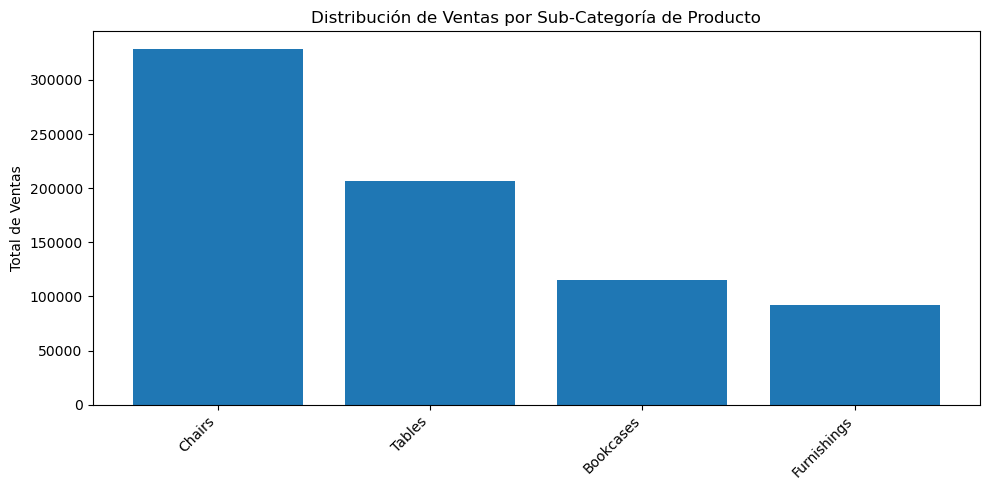

In [37]:
# Grafica de barras del total de ventas por sub-categoría
plt.figure(figsize=(10, 5))
plt.bar(ventas_por_subcategoria_tabla['Sub-Category'], ventas_por_subcategoria_tabla['Total_Ventas'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total de Ventas')
plt.title('Distribución de Ventas por Sub-Categoría de Producto')
plt.tight_layout()
plt.show()

In [38]:
# Análisis de distribución de ventas por Producto
print("\n=== TOP PRODUCTOS INDIVIDUALES POR VENTAS TOTALES ===")

# Agrupar ventas por producto individual
ventas_por_producto = paso5_analysis_data_stores_sales.groupby('Product Name')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Cantidad_Transacciones', 'count')
]).sort_values('Total_Ventas', ascending=False)

# Calcular venta promedio por transacción
ventas_por_producto['Venta_Promedio'] = (ventas_por_producto['Total_Ventas'] / ventas_por_producto['Cantidad_Transacciones']).round(2)

# Mostrar Product Name como columna
ventas_por_producto_tabla = ventas_por_producto.reset_index()

print("\nTop 10 productos con mayores ventas:")
print(ventas_por_producto_tabla.head(10).round(2).to_string(index=False))


=== TOP PRODUCTOS INDIVIDUALES POR VENTAS TOTALES ===

Top 10 productos con mayores ventas:
                                                 Product Name  Total_Ventas  Cantidad_Transacciones  Venta_Promedio
                 HON 5400 Series Task Chairs for Big and Tall      21870.58                       8         2733.82
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish      15610.97                       5         3122.19
                   Bretford Rectangular Conference Table Tops      12995.29                      12         1082.94
                Global Troy Executive Leather Low-Back Tilter      12975.38                       9         1441.71
                                     SAFCO Arco Folding Chair      11572.78                      13          890.21
                        DMI Eclipse Executive Suite Bookcases      11046.61                       6         1841.10
  Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back      10637.53                    

##### Análisis de distribución de ventas por Sucursal

In [39]:
# Analisis por sucursal
# print("\n=== DISTRIBUCIÓN DE VENTAS POR SUCURSAL ===")

# Agrupar ventas por sucursal
ventas_por_sucursal = paso5_analysis_data_stores_sales.groupby('Branch')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Promedio_Ventas', 'mean'),
    ('Cantidad_Transacciones', 'count')
]).sort_values('Total_Ventas', ascending=False)

# Mostrar el top 10 de sucursales con mayores ventas
print("\nTop 15 sucursales con mayores ventas:")
print(ventas_por_sucursal.head(10).round(2))

print("\nTop 10 sucursales con menores ventas:")
print(ventas_por_sucursal.tail(10).round(2))


Top 15 sucursales con mayores ventas:
            Total_Ventas  Promedio_Ventas  Cantidad_Transacciones
Branch                                                           
Branch 273      75691.05           394.22                     192
Branch 221      54000.04           350.65                     154
Branch 367      40995.88           422.64                      97
Branch 309      36495.54           328.79                     111
Branch 358      36357.31           356.44                     102
Branch 173      23183.21           286.21                      81
Branch 357      20031.24           435.46                      46
Branch 104      16364.01           584.43                      28
Branch 62       12495.22           183.75                      68
Branch 91        7306.87           270.62                      27

Top 10 sucursales con menores ventas:
            Total_Ventas  Promedio_Ventas  Cantidad_Transacciones
Branch                                                          

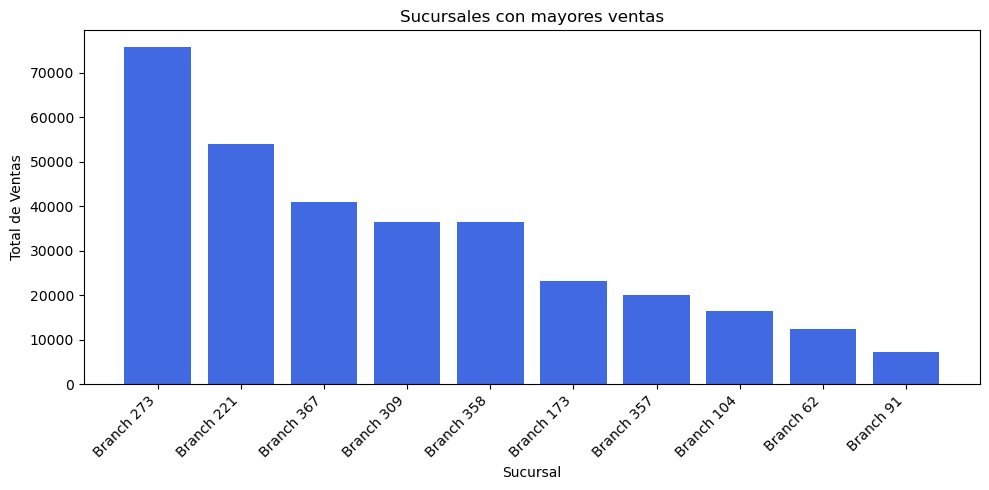

In [40]:
# Top 10 sucursales con mayores ventas
top_sucursales = ventas_por_sucursal.head(10)
plt.figure(figsize=(10,5))
plt.bar(top_sucursales.index, top_sucursales['Total_Ventas'], color='royalblue')
plt.title('Sucursales con mayores ventas')
plt.ylabel('Total de Ventas')
plt.xlabel('Sucursal')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

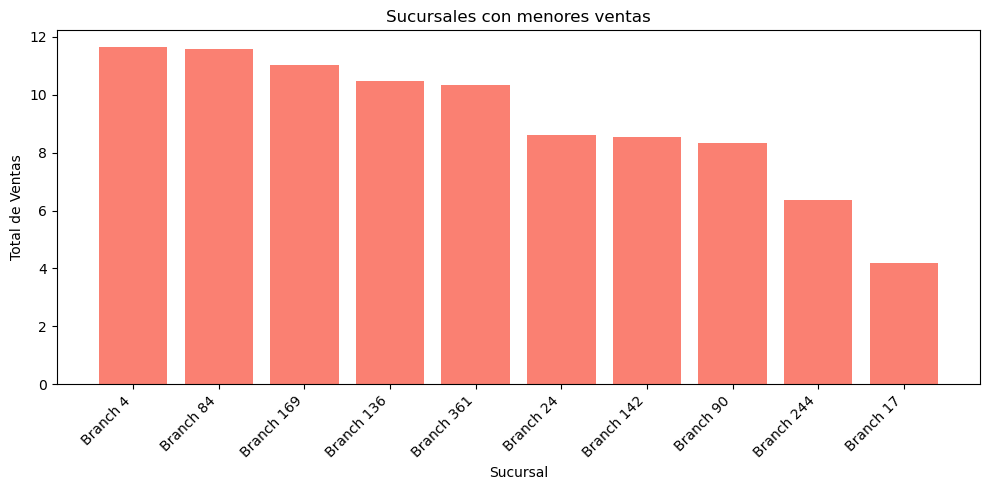

In [41]:
# Top 10 sucursales con menores ventas
bottom_sucursales = ventas_por_sucursal.tail(10)
plt.figure(figsize=(10,5))
plt.bar(bottom_sucursales.index, bottom_sucursales['Total_Ventas'], color='salmon')
plt.title('Sucursales con menores ventas')
plt.ylabel('Total de Ventas')
plt.xlabel('Sucursal')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
# Analisis por Estado
# print("\n=== DISTRIBUCIÓN DE VENTAS POR ESTADO ===")

# Agrupar ventas por estado
ventas_por_estado = paso5_analysis_data_stores_sales.groupby('State')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Promedio_Ventas', 'mean'),
    ('Cantidad_Transacciones', 'count')
]).sort_values('Total_Ventas', ascending=False)

print("\nTop 10 estados con mayores ventas:")
print(ventas_por_estado.head(10).round(2))


Top 10 estados con mayores ventas:
              Total_Ventas  Promedio_Ventas  Cantidad_Transacciones
State                                                              
California       156064.60           351.50                     444
New York          93372.73           395.65                     236
Texas             60593.29           299.97                     202
Washington        48020.15           421.23                     114
Pennsylvania      39354.93           314.84                     125
Illinois          28274.52           229.87                     123
Virginia          25321.95           486.96                      52
Ohio              24199.14           260.21                      93
Florida           22987.04           270.44                      85
Michigan          22321.10           446.42                      50


##### Análisis de distribución de ventas por Periodo de tiempo

In [43]:
# Analisis de ventas por dia de la semana
print("\n===DISTRIBUCIÓN DE VENTAS POR DÍA DE LA SEMANA ===")

# Agrupar ventas por día de la semana
paso5_analysis_data_stores_sales['Day_of_Week'] = paso5_analysis_data_stores_sales['Order Date'].dt.day_name()
ventas_por_dia_semana = paso5_analysis_data_stores_sales.groupby('Day_of_Week')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Promedio_Ventas', 'mean'),
    ('Cantidad_Transacciones', 'count')
])

# Ordenar por días de la semana segun formato en el dataset
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana = ventas_por_dia_semana.reindex(orden_dias)

print("\nVentas por Día de la Semana:")
print(ventas_por_dia_semana.round(2))


===DISTRIBUCIÓN DE VENTAS POR DÍA DE LA SEMANA ===

Ventas por Día de la Semana:
             Total_Ventas  Promedio_Ventas  Cantidad_Transacciones
Day_of_Week                                                       
Monday          159826.60           378.74                     422
Tuesday          85832.35           341.96                     251
Wednesday        32616.58           412.87                      79
Thursday        107079.89           343.20                     312
Friday          135657.25           356.99                     380
Saturday        102558.63           316.54                     324
Sunday          118428.50           335.49                     353


In [44]:
# Analisis de ventas por mes
print("\n===DISTRIBUCIÓN DE VENTAS POR MES ===")

# Agrupar ventas por mes
paso5_analysis_data_stores_sales['Month'] = paso5_analysis_data_stores_sales['Order Date'].dt.month
ventas_por_mes = paso5_analysis_data_stores_sales.groupby('Month')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Promedio_Ventas', 'mean'),
    ('Cantidad_Transacciones', 'count')
]).sort_index()

# Agregar nombres de meses
meses_nombres = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
                 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
ventas_por_mes['Mes'] = ventas_por_mes.index.map(meses_nombres)

print("\nVentas por Mes:")
print(ventas_por_mes[['Mes', 'Total_Ventas', 'Promedio_Ventas', 'Cantidad_Transacciones']].round(2))


===DISTRIBUCIÓN DE VENTAS POR MES ===

Ventas por Mes:
              Mes  Total_Ventas  Promedio_Ventas  Cantidad_Transacciones
Month                                                                   
1           Enero      31569.24           389.74                      81
2         Febrero      15765.92           250.25                      63
3           Marzo      50768.28           362.63                     140
4           Abril      40698.58           294.92                     138
5            Mayo      48365.13           322.43                     150
6           Junio      52999.46           365.51                     145
7           Julio      49377.01           301.08                     164
8          Agosto      44884.04           361.97                     124
9      Septiembre     106380.59           377.24                     282
10        Octubre      58087.52           310.63                     187
11      Noviembre     121286.05           380.21                    

In [45]:
# Analisis de ventas por año
print("\n===DISTRIBUCIÓN DE VENTAS POR AÑO ===")

# Agrupar ventas por año
paso5_analysis_data_stores_sales['Year'] = paso5_analysis_data_stores_sales['Order Date'].dt.year
ventas_por_anio = paso5_analysis_data_stores_sales.groupby('Year')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Promedio_Ventas', 'mean'),
    ('Cantidad_Transacciones', 'count')
]).sort_index()

print("\nVentas por Año:")
print(ventas_por_anio.round(2))


===DISTRIBUCIÓN DE VENTAS POR AÑO ===

Ventas por Año:
      Total_Ventas  Promedio_Ventas  Cantidad_Transacciones
Year                                                       
2014     157192.85           373.38                     421
2015     170518.24           377.25                     452
2016     198901.44           353.92                     562
2017     215387.27           313.98                     686


In [47]:
# Validacion se agregan nuevas columnas
paso5_analysis_data_stores_sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Day_of_Week,Month,Year
0,849,CA-2017-107503,2017-01-01,2017-01-06,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,Sunday,1,2017
1,4010,CA-2017-144463,2017-01-01,2017-01-05,Standard Class,SC-20725,Steven Cartwright,Consumer,United States,Los Angeles,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,Sunday,1,2017
2,8071,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,Sunday,1,2017
3,8072,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352,Sunday,1,2017
4,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954,Friday,1,2014


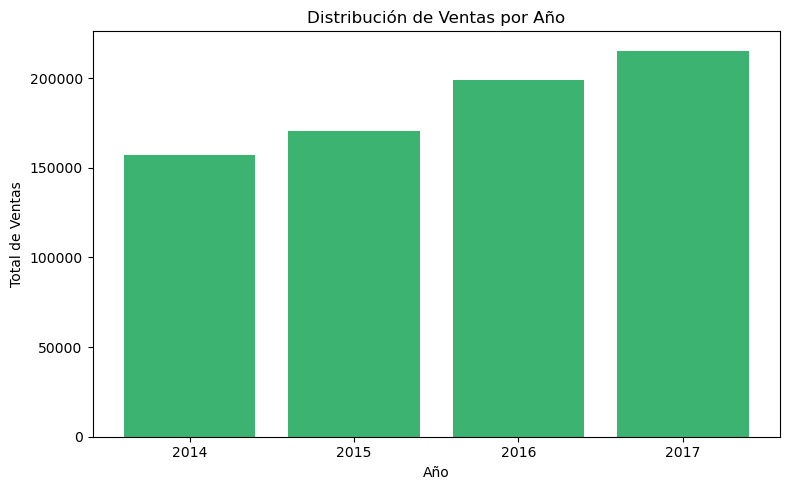

In [48]:
# Gráfico de barras de ventas totales por año
plt.figure(figsize=(8, 5))
plt.bar(ventas_por_anio.index, ventas_por_anio['Total_Ventas'], color='mediumseagreen')
plt.xlabel('Año')
plt.ylabel('Total de Ventas')
plt.title('Distribución de Ventas por Año')
plt.xticks(ventas_por_anio.index)
plt.tight_layout()
plt.show()

--------------------

### 6. Exploración temporal

In [49]:
# Crear copia de dataset para no afectar cambios en la version del paso 5
paso6_exploration_data_stores_sales = paso5_analysis_data_stores_sales.copy()

> ##### a. Graficar la evolución de ventas a lo largo del tiempo.


=== EVOLUCIÓN DE VENTAS MENSUALES ===


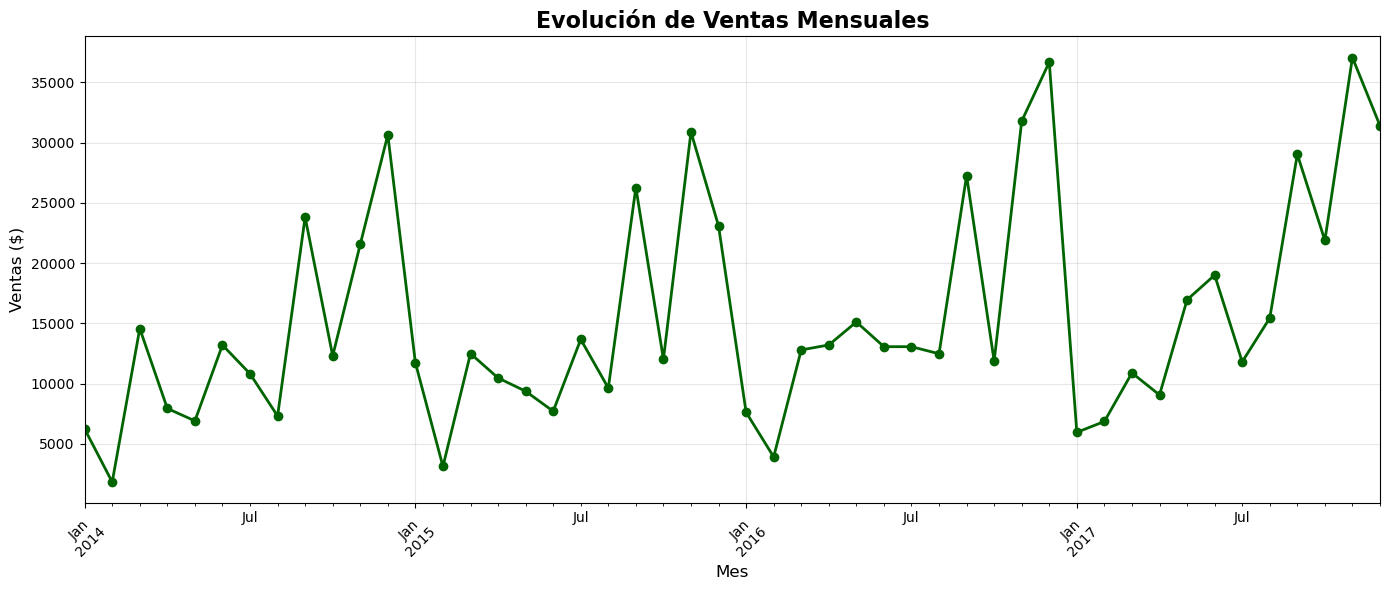


Estadísticas de ventas mensuales:
  - Promedio mensual: $15,458.33
  - Mediana mensual: $12,650.44
  - Máximo mensual: $37,056.71
  - Mínimo mensual: $1,839.66


In [50]:
# Analisis de la evolucion de ventas
print("\n=== EVOLUCIÓN DE VENTAS MENSUALES ===")

# Agrupar ventas por mes
paso6_exploration_data_stores_sales['Year_Month'] = paso6_exploration_data_stores_sales['Order Date'].dt.to_period('M')
ventas_mensuales = paso6_exploration_data_stores_sales.groupby('Year_Month')['Sales'].sum().sort_index()

# Crear la gráfica
fig, ax = plt.subplots(figsize=(14, 6))
ventas_mensuales.plot(kind='line', ax=ax, linewidth=2, color='darkgreen', marker='o')
ax.set_title('Evolución de Ventas Mensuales', fontsize=16, fontweight='bold')
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Ventas ($)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nEstadísticas de ventas mensuales:")
print(f"  - Promedio mensual: ${ventas_mensuales.mean():,.2f}")
print(f"  - Mediana mensual: ${ventas_mensuales.median():,.2f}")
print(f"  - Máximo mensual: ${ventas_mensuales.max():,.2f}")
print(f"  - Mínimo mensual: ${ventas_mensuales.min():,.2f}")

> ##### b. Identificar patrones de:

i. Tendencia


=== TENDENCIA ANUAL DE VENTAS ===


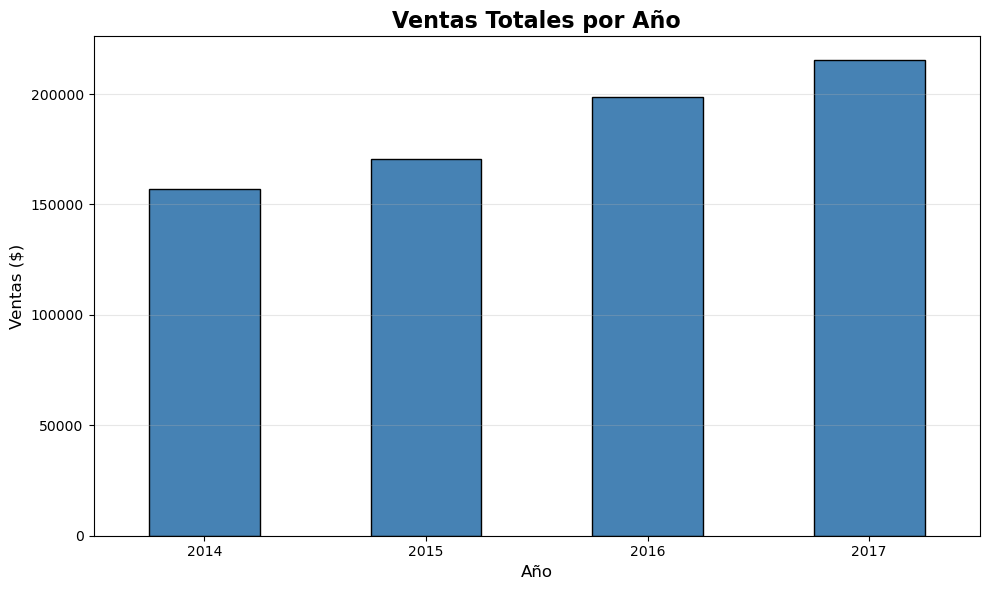


Crecimiento año con año:
  - 2014 a 2015: +8.48%
  - 2015 a 2016: +16.65%
  - 2016 a 2017: +8.29%


In [51]:
# Analisis de tendencia
print("\n=== TENDENCIA ANUAL DE VENTAS ===")

# Agrupar ventas por año
ventas_anuales = paso6_exploration_data_stores_sales.groupby(paso6_exploration_data_stores_sales['Order Date'].dt.year)['Sales'].sum()

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))
ventas_anuales.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Ventas Totales por Año', fontsize=16, fontweight='bold')
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Ventas ($)', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calcular crecimiento año con año
print("\nCrecimiento año con año:")
for i in range(1, len(ventas_anuales)):
    año_actual = ventas_anuales.index[i]
    año_anterior = ventas_anuales.index[i-1]
    crecimiento = ((ventas_anuales.iloc[i] - ventas_anuales.iloc[i-1]) / ventas_anuales.iloc[i-1] * 100)
    print(f"  - {año_anterior} a {año_actual}: {crecimiento:+.2f}%")

ii. Estacionalidad


=== ANÁLISIS DE ESTACIONALIDAD MENSUAL ===


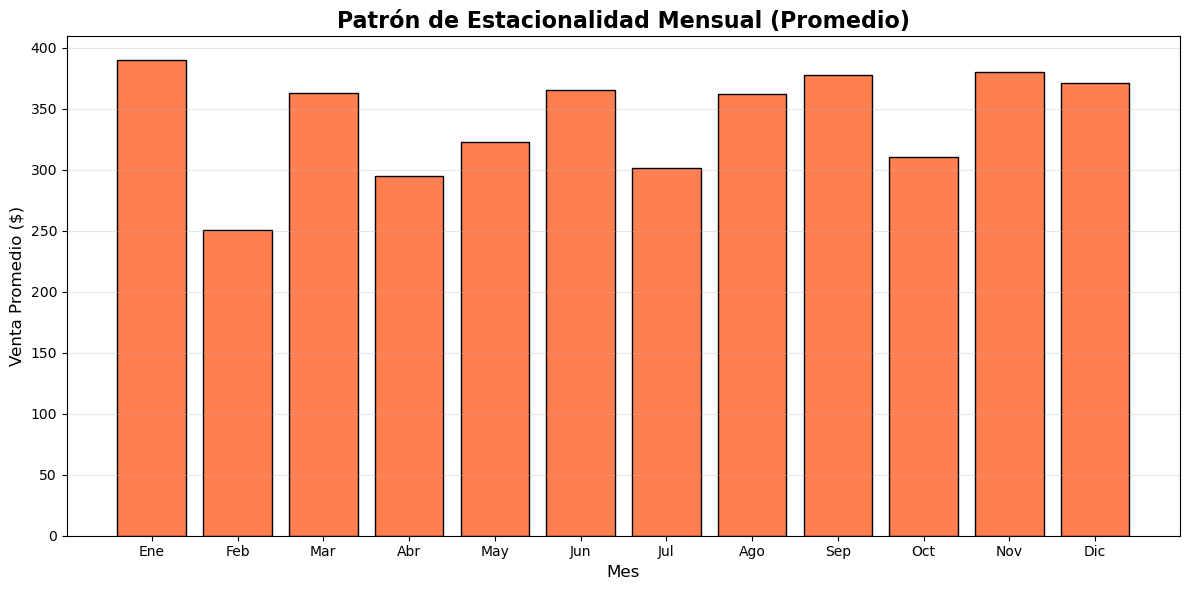


Meses con mayores ventas promedio:
  - Ene: $389.74
  - Nov: $380.21
  - Sep: $377.24

Meses con menores ventas promedio:
  - Feb: $250.25
  - Abr: $294.92
  - Jul: $301.08


In [52]:
# Analisis de estacionalidad
print("\n=== ANÁLISIS DE ESTACIONALIDAD MENSUAL ===")

# Agrupar ventas por mes del año (promediando todos los años)
paso6_exploration_data_stores_sales['Month_Name'] = paso6_exploration_data_stores_sales['Order Date'].dt.month
ventas_por_mes_promedio = paso6_exploration_data_stores_sales.groupby('Month_Name')['Sales'].mean().sort_index()

# Crear la gráfica de estacionalidad mensual
fig, ax = plt.subplots(figsize=(12, 6))
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ax.bar(range(1, 13), ventas_por_mes_promedio.values, color='coral', edgecolor='black')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(meses)
ax.set_title('Patrón de Estacionalidad Mensual (Promedio)', fontsize=16, fontweight='bold')
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Venta Promedio ($)', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nMeses con mayores ventas promedio:")
mayores_ventas = ventas_por_mes_promedio.nlargest(3)
for mes, venta in mayores_ventas.items():
    nombre_mes = meses[mes-1]
    print(f"  - {nombre_mes}: ${venta:,.2f}")

print("\nMeses con menores ventas promedio:")
menores_ventas = ventas_por_mes_promedio.nsmallest(3)
for mes, venta in menores_ventas.items():
    nombre_mes = meses[mes-1]
    print(f"  - {nombre_mes}: ${venta:,.2f}")

iii. Picos o caídas abruptas

In [53]:
# Analisis picos o caidas
print("\n=== IDENTIFICACIÓN DE PICOS Y CAÍDAS EN VENTAS ===")

# Ordenar por fecha de orden y ventas
ventas_diarias = paso6_exploration_data_stores_sales.groupby('Order Date')['Sales'].sum().sort_index()

# Calcular percentil 95 para identificar picos
percentil_95 = ventas_diarias.quantile(0.95)

# Identificar días con picos de ventas
dias_picos = ventas_diarias[ventas_diarias >= percentil_95].sort_values(ascending=False)

print(f"\nCriterio de pico: Ventas >= ${percentil_95:,.2f} (Percentil 95)")
print(f"Total de días con picos identificados: {len(dias_picos)}")

print("\nTop 10 días con mayores ventas:")
for fecha, venta in dias_picos.head(10).items():
    print(f"  - {fecha.strftime('%d/%m/%Y')}: ${venta:,.2f}")


=== IDENTIFICACIÓN DE PICOS Y CAÍDAS EN VENTAS ===

Criterio de pico: Ventas >= $2,875.05 (Percentil 95)
Total de días con picos identificados: 45

Top 10 días con mayores ventas:
  - 17/09/2015: $10,006.17
  - 25/12/2016: $6,636.86
  - 01/12/2015: $6,600.68
  - 20/09/2017: $5,496.17
  - 17/11/2014: $5,270.08
  - 08/11/2015: $5,252.43
  - 17/08/2017: $4,970.11
  - 12/12/2014: $4,695.60
  - 28/11/2017: $4,659.14
  - 01/12/2014: $4,513.61


In [54]:
# Analisis picos o caidas
print("\n=== IDENTIFICACIÓN DE PICOS Y CAÍDAS EN VENTAS ===")

# Validacion si la variable ventas_diarias existe, de lo contrario ordenar por fecha de orden y sumar ventas
if 'ventas_diarias' not in locals():
    ventas_diarias = paso6_exploration_data_stores_sales.groupby('Order Date')['Sales'].sum().sort_index()

# Calcular percentil 5 para identificar caídas
percentil_5 = ventas_diarias.quantile(0.05)

# Identificar días con caídas de ventas
dias_caidas = ventas_diarias[ventas_diarias <= percentil_5].sort_values()

print(f"\nCriterio de caída: Ventas <= ${percentil_5:,.2f} (Percentil 5)")
print(f"Total de días con caídas identificados: {len(dias_caidas)}")

print("\nTop 10 días con menores ventas:")
for fecha, venta in dias_caidas.head(10).items():
    print(f"  - {fecha.strftime('%d/%m/%Y')}: ${venta:,.2f}")


=== IDENTIFICACIÓN DE PICOS Y CAÍDAS EN VENTAS ===

Criterio de caída: Ventas <= $18.87 (Percentil 5)
Total de días con caídas identificados: 45

Top 10 días con menores ventas:
  - 26/04/2017: $1.99
  - 23/08/2017: $2.78
  - 20/03/2017: $2.91
  - 23/08/2014: $4.22
  - 24/06/2014: $4.27
  - 06/06/2017: $4.95
  - 17/10/2014: $5.31
  - 04/04/2014: $5.47
  - 17/06/2014: $6.24
  - 25/08/2014: $6.28



=== VISUALIZACIÓN DE PICOS Y CAÍDAS ===


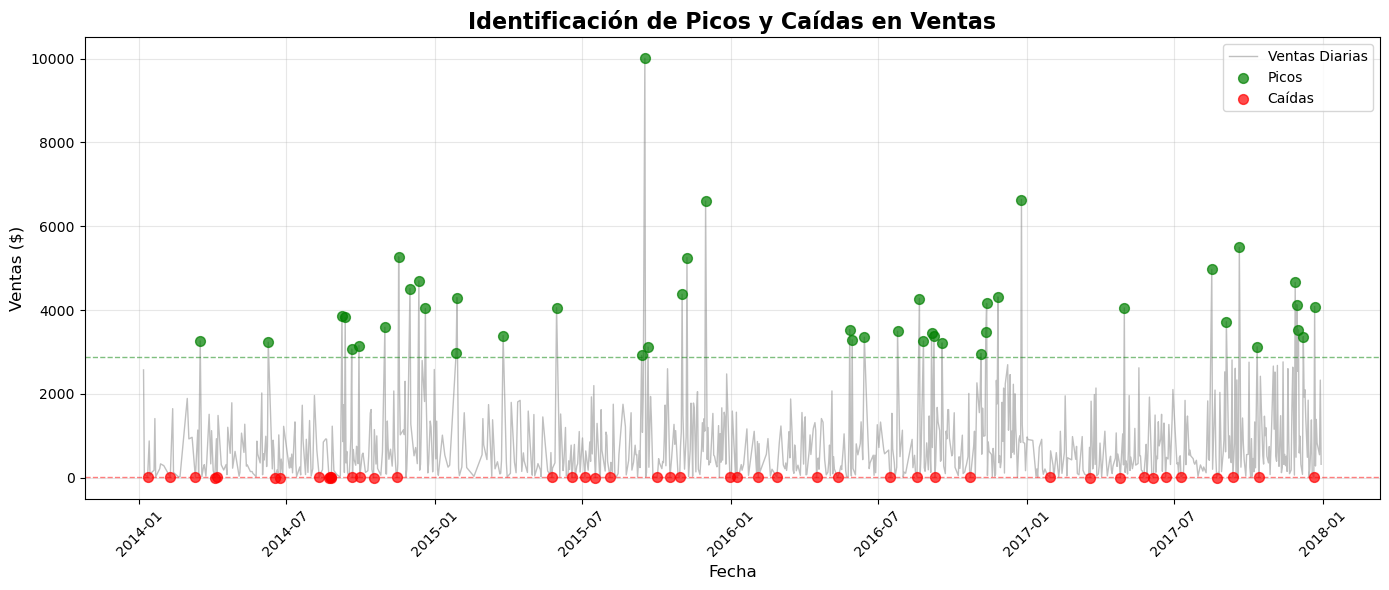

In [55]:
# Analisis de gráfica de picos o caidas
print("\n=== VISUALIZACIÓN DE PICOS Y CAÍDAS ===")

# Asegurar que las variables necesarias existen
if 'ventas_diarias' not in locals():
    ventas_diarias = paso6_exploration_data_stores_sales.groupby('Order Date')['Sales'].sum().sort_index()
    percentil_95 = ventas_diarias.quantile(0.95)
    percentil_5 = ventas_diarias.quantile(0.05)
    dias_picos = ventas_diarias[ventas_diarias >= percentil_95].sort_values(ascending=False)
    dias_caidas = ventas_diarias[ventas_diarias <= percentil_5].sort_values()

# Crear gráfica para picos y caídas
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(ventas_diarias.index, ventas_diarias.values, 
        linewidth=1, color='gray', alpha=0.5, label='Ventas Diarias')
ax.scatter(dias_picos.index, dias_picos.values, 
           color='green', s=50, alpha=0.7, label='Picos', zorder=5)
ax.scatter(dias_caidas.index, dias_caidas.values, 
           color='red', s=50, alpha=0.7, label='Caídas', zorder=5)
ax.axhline(y=percentil_95, color='green', linestyle='--', linewidth=1, alpha=0.5)
ax.axhline(y=percentil_5, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.set_title('Identificación de Picos y Caídas en Ventas', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Ventas ($)', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

iv. Analizar si hay ciclos por días de la semana o meses del año


=== ANÁLISIS DE CICLOS SEMANALES POR MES ===


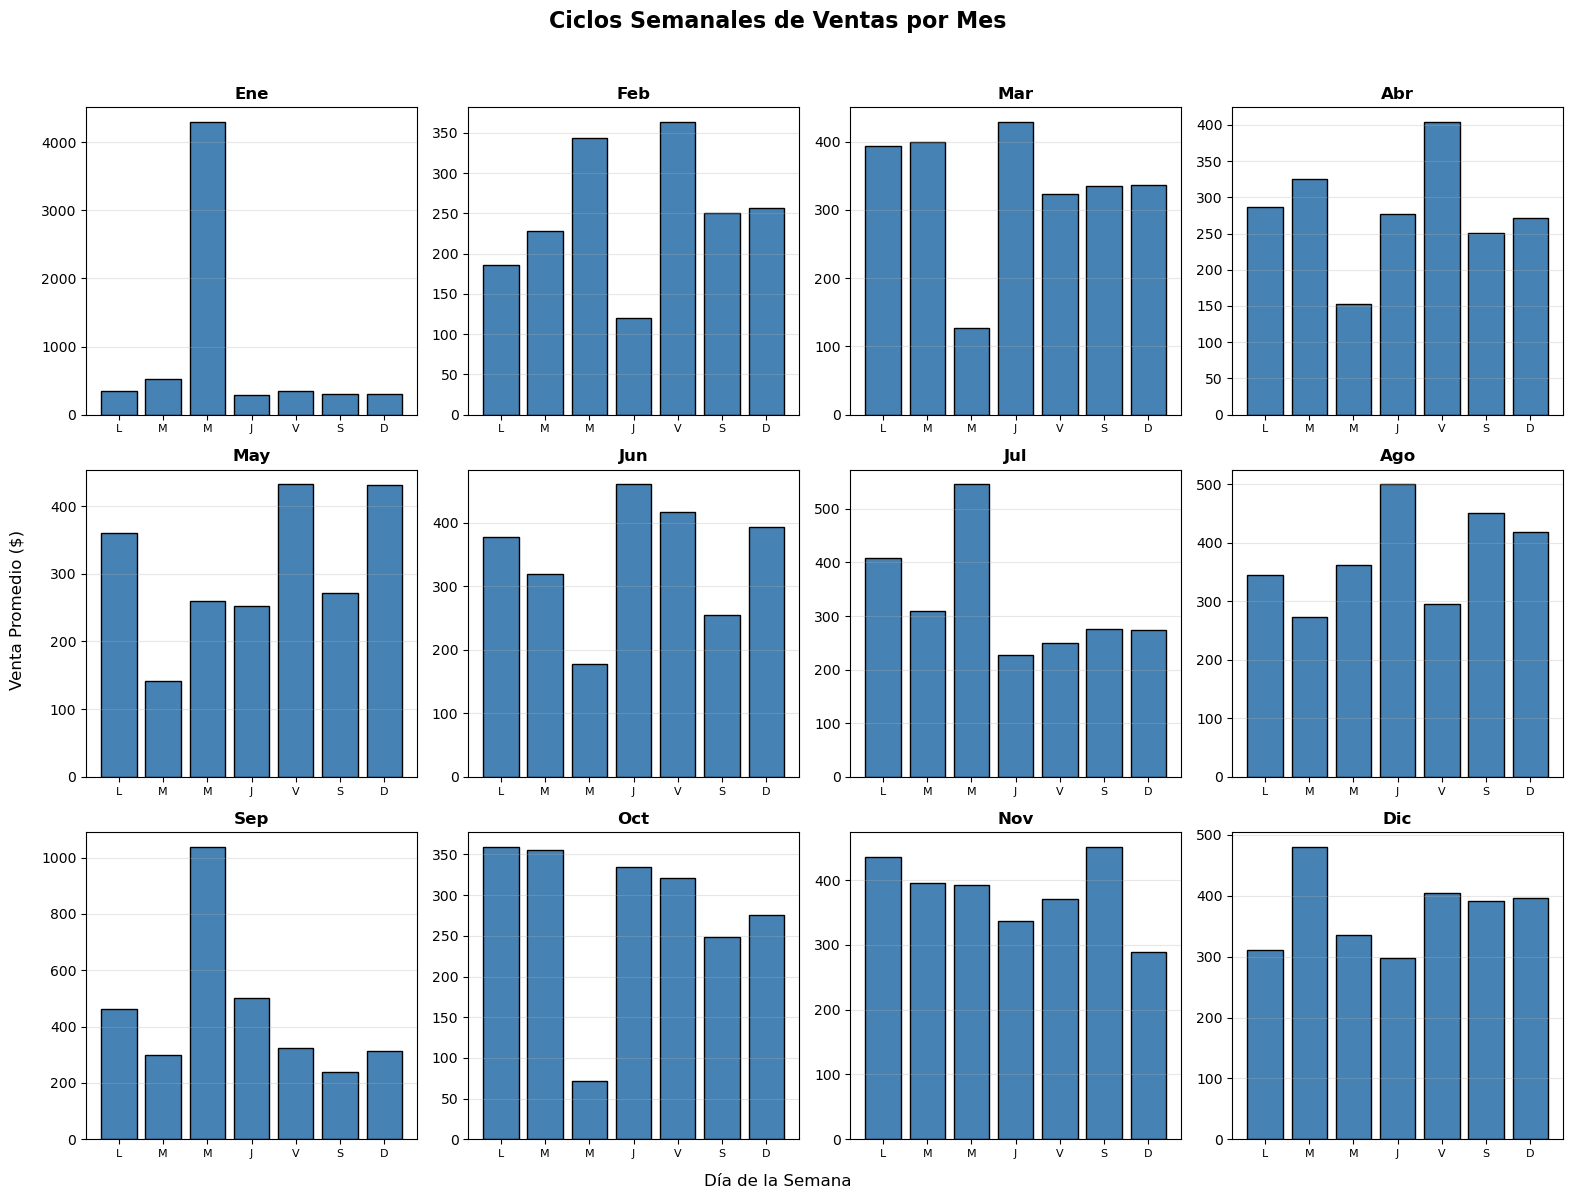

In [56]:
# Analizar ciclos
print("\n=== ANÁLISIS DE CICLOS SEMANALES POR MES ===")

# Definir nombres de meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Ventas por día de la semana para cada mes
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i in range(1, 13):
    # Filtrar datos del mes i
    df_mes = paso6_exploration_data_stores_sales[paso6_exploration_data_stores_sales['Order Date'].dt.month == i].copy()
    
    # Calcular ventas promedio por día de la semana
    ventas_dia = df_mes.groupby(df_mes['Order Date'].dt.dayofweek)['Sales'].mean().reindex(range(7), fill_value=0)
    
    ax = axes[i-1]
    ax.bar(range(7), ventas_dia.values, color='steelblue', edgecolor='black')
    ax.set_title(meses[i-1], fontsize=12, fontweight='bold')
    ax.set_xticks(range(7))
    ax.set_xticklabels(['L', 'M', 'M', 'J', 'V', 'S', 'D'], fontsize=8)
    ax.grid(True, alpha=0.3, axis='y')

fig.suptitle('Ciclos Semanales de Ventas por Mes', fontsize=16, fontweight='bold', y=1.00)
fig.text(0.5, 0.02, 'Día de la Semana', ha='center', fontsize=12)
fig.text(0.02, 0.5, 'Venta Promedio ($)', va='center', rotation='vertical', fontsize=12)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.98])
plt.show()

--------------------

### 7. Análisis comparativo entre sucursales y productos

> ##### a. Identificar productos más vendidos y menos vendidos.

In [57]:
# Productos mas vendidos
# Similar a resultado anterior sobre "Análisis de distribución de ventas por Producto"
print("\n=== TOP PRODUCTOS MAS VENDIDOS ===")

# Agrupar ventas por producto individual (se usa dataframe paso5 paso5_analysis_data_stores_sales)
ventas_por_producto_mas_vendidos = paso5_analysis_data_stores_sales.groupby('Product Name')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Cantidad_Transacciones', 'count')
]).sort_values('Total_Ventas', ascending=False)

# Calcular venta promedio por transacción
ventas_por_producto_mas_vendidos['Venta_Promedio'] = (ventas_por_producto_mas_vendidos['Total_Ventas'] / ventas_por_producto_mas_vendidos['Cantidad_Transacciones']).round(2)

# Mostrar Product Name como columna
ventas_por_producto_mas_vendidos_tabla = ventas_por_producto_mas_vendidos.reset_index()

print("\nTop 10 productos con mayores ventas:")
print(ventas_por_producto_mas_vendidos_tabla.head(10).round(2).to_string(index=False))


=== TOP PRODUCTOS MAS VENDIDOS ===

Top 10 productos con mayores ventas:
                                                 Product Name  Total_Ventas  Cantidad_Transacciones  Venta_Promedio
                 HON 5400 Series Task Chairs for Big and Tall      21870.58                       8         2733.82
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish      15610.97                       5         3122.19
                   Bretford Rectangular Conference Table Tops      12995.29                      12         1082.94
                Global Troy Executive Leather Low-Back Tilter      12975.38                       9         1441.71
                                     SAFCO Arco Folding Chair      11572.78                      13          890.21
                        DMI Eclipse Executive Suite Bookcases      11046.61                       6         1841.10
  Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back      10637.53                      12          886.4

In [58]:
# Productos menos vendidos
# Similar a resultado anterior sobre "Análisis de distribución de ventas por Producto"
print("\n=== TOP PRODUCTOS MENOS VENDIDOS ===")

# Usar la misma agrupación de ventas por producto
# Si no existe la variable, recalcular
ventas_por_producto_menos_vendidos = paso5_analysis_data_stores_sales.groupby('Product Name')['Sales'].agg([
    ('Total_Ventas', 'sum'),
    ('Cantidad_Transacciones', 'count')
]).sort_values('Total_Ventas', ascending=False)

ventas_por_producto_menos_vendidos['Venta_Promedio'] = (ventas_por_producto_menos_vendidos['Total_Ventas'] / ventas_por_producto_menos_vendidos['Cantidad_Transacciones']).round(2)

# Mostrar Product Name como columna
ventas_por_producto_menos_vendidos_tabla = ventas_por_producto_menos_vendidos.reset_index()

print("\nTop 10 productos con menores ventas:")
print(ventas_por_producto_menos_vendidos_tabla.tail(10).round(2).to_string(index=False))


=== TOP PRODUCTOS MENOS VENDIDOS ===

Top 10 productos con menores ventas:
                                                                 Product Name  Total_Ventas  Cantidad_Transacciones  Venta_Promedio
GE General Purpose, Extra Long Life, Showcase & Floodlight Incandescent Bulbs         45.40                       7            6.49
                                                         Document Clip Frames         45.04                       2           22.52
                          Eldon Regeneration Recycled Desk Accessories, Black         39.69                       3           13.23
                                                Eldon Pizzaz Desk Accessories         37.46                       4            9.37
                                             Eldon 100 Class Desk Accessories         36.40                       4            9.10
                                                Contemporary Borderless Frame         36.16                       2           18.08


> ##### b. Comparar desempeño entre sucursales.

In [59]:
# Desempeño de sucursales
print("\n=== COMPARACIÓN DE DESEMPEÑO ENTRE SUCURSALES ===")

# Agrupar métricas clave por sucursal
desempenio_sucursales = paso5_analysis_data_stores_sales.groupby('Branch').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean']
}).round(2)

# Aplanar los nombres de las columnas multinivel
desempenio_sucursales.columns = ['Total_Ventas', 'Promedio_Ventas', 'Num_Transacciones',
                                  'Total_Ganancia', 'Promedio_Ganancia']

# Ordenar por ventas totales descendente
desempenio_sucursales = desempenio_sucursales.sort_values('Total_Ventas', ascending=False)

# Resetear índice para mostrar Branch como columna
desempenio_sucursales_tabla = desempenio_sucursales.reset_index()

# Mostrar top 15 sucursales con mejor desempeño
print("\nTop 15 sucursales con mejor desempeño:")
print(desempenio_sucursales_tabla.head(10).to_string(index=False))

# Mostrar top 10 sucursales con menor desempeño
print("\n\nTop 10 sucursales con menor desempeño:")
print(desempenio_sucursales_tabla.tail(10).to_string(index=False))


=== COMPARACIÓN DE DESEMPEÑO ENTRE SUCURSALES ===

Top 15 sucursales con mejor desempeño:
    Branch  Total_Ventas  Promedio_Ventas  Num_Transacciones  Total_Ganancia  Promedio_Ganancia
Branch 273      75691.05           394.22                192         5306.69              27.64
Branch 221      54000.04           350.65                154         3071.59              19.95
Branch 367      40995.88           422.64                 97         6208.82              64.01
Branch 309      36495.54           328.79                111        -6827.13             -61.51
Branch 358      36357.31           356.44                102         1491.38              14.62
Branch 173      23183.21           286.21                 81        -3404.80             -42.03
Branch 357      20031.24           435.46                 46         1106.35              24.05
Branch 104      16364.01           584.43                 28         3332.67             119.02
 Branch 62      12495.22           183.75    

> ##### c. Detectar outliers o comportamientos anómalos por sucursal o producto.

In [60]:
# Detección de comportamientos anomalos
print("\n=== DETECCIÓN DE OUTLIERS EN VENTAS POR SUCURSAL ===")

# Calcular cuartiles e IQR para ventas por sucursal
Q1 = desempenio_sucursales['Total_Ventas'].quantile(0.25)
Q3 = desempenio_sucursales['Total_Ventas'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers superiores (ventas anómalamente altas)
outliers_superiores = desempenio_sucursales[
    desempenio_sucursales['Total_Ventas'] > limite_superior
]

# Identificar outliers inferiores (ventas anómalamente bajas)
outliers_inferiores = desempenio_sucursales[
    desempenio_sucursales['Total_Ventas'] < limite_inferior
]

# Mostrar resultados
print(f"\nEstadísticas de ventas por sucursal:")
print(f"  Q1 (Percentil 25): ${Q1:,.2f}")
print(f"  Q3 (Percentil 75): ${Q3:,.2f}")
print(f"  IQR: ${IQR:,.2f}")
print(f"  Límite superior para outliers: ${limite_superior:,.2f}")
print(f"  Límite inferior para outliers: ${limite_inferior:,.2f}")

print(f"\n\nSucursales con ventas altas anómalas: {len(outliers_superiores)}")
if len(outliers_superiores) > 0:
    outliers_superiores_tabla = outliers_superiores.reset_index()
    print(outliers_superiores_tabla[['Branch', 'Total_Ventas', 'Num_Transacciones']].to_string(index=False))

print(f"\n\nSucursales con ventas bajas anómalas: {len(outliers_inferiores)}")
if len(outliers_inferiores) > 0:
    outliers_inferiores_tabla = outliers_inferiores.reset_index()
    print(outliers_inferiores_tabla[['Branch', 'Total_Ventas', 'Num_Transacciones']].to_string(index=False))


=== DETECCIÓN DE OUTLIERS EN VENTAS POR SUCURSAL ===

Estadísticas de ventas por sucursal:
  Q1 (Percentil 25): $181.82
  Q3 (Percentil 75): $1,536.99
  IQR: $1,355.17
  Límite superior para outliers: $3,569.75
  Límite inferior para outliers: $-1,850.93


Sucursales con ventas altas anómalas: 32
    Branch  Total_Ventas  Num_Transacciones
Branch 273      75691.05                192
Branch 221      54000.04                154
Branch 367      40995.88                 97
Branch 309      36495.54                111
Branch 358      36357.31                102
Branch 173      23183.21                 81
Branch 357      20031.24                 46
Branch 104      16364.01                 28
 Branch 62      12495.22                 68
 Branch 91       7306.87                 27
Branch 180       7056.66                 17
Branch 163       6980.35                 13
Branch 378       6908.00                 10
Branch 249       6649.71                 16
 Branch 43       5949.21                 

In [61]:
# Detección de outliers
print("\n=== DETECCIÓN DE OUTLIERS EN VENTAS POR PRODUCTO ===")

# Calcular cuartiles e IQR para ventas por producto
Q1_prod = ventas_por_producto['Total_Ventas'].quantile(0.25)
Q3_prod = ventas_por_producto['Total_Ventas'].quantile(0.75)
IQR_prod = Q3_prod - Q1_prod

# Calcular límites para identificar outliers
limite_inferior_prod = Q1_prod - 1.5 * IQR_prod
limite_superior_prod = Q3_prod + 1.5 * IQR_prod

# Identificar outliers superiores (ventas anómalamente altas)
outliers_productos_superiores = ventas_por_producto[
    ventas_por_producto['Total_Ventas'] > limite_superior_prod
]

# Identificar outliers inferiores (ventas anómalamente bajas)
outliers_productos_inferiores = ventas_por_producto[
    ventas_por_producto['Total_Ventas'] < limite_inferior_prod
]

# Mostrar resultados
print(f"\nEstadísticas de ventas por producto:")
print(f"  Q1 (Percentil 25): ${Q1_prod:,.2f}")
print(f"  Q3 (Percentil 75): ${Q3_prod:,.2f}")
print(f"  IQR: ${IQR_prod:,.2f}")
print(f"  Límite superior para outliers: ${limite_superior_prod:,.2f}")
print(f"  Límite inferior para outliers: ${limite_inferior_prod:,.2f}")

print(f"\n\nProductos con ventas altas: {len(outliers_productos_superiores)}")
if len(outliers_productos_superiores) > 0:
    outliers_productos_superiores_tabla = outliers_productos_superiores.reset_index()
    print("\nTop 15 productos outliers con mayores ventas:")
    print(outliers_productos_superiores_tabla.head(15).to_string(index=False))

print(f"\n\nProductos con ventas bajas: {len(outliers_productos_inferiores)}")
if len(outliers_productos_inferiores) > 0:
    outliers_productos_inferiores_tabla = outliers_productos_inferiores.reset_index()
    print("\nAlgunos productos outliers con menores ventas:")
    print(outliers_productos_inferiores_tabla.head(10).to_string(index=False))


=== DETECCIÓN DE OUTLIERS EN VENTAS POR PRODUCTO ===

Estadísticas de ventas por producto:
  Q1 (Percentil 25): $230.17
  Q3 (Percentil 75): $2,601.59
  IQR: $2,371.42
  Límite superior para outliers: $6,158.72
  Límite inferior para outliers: $-3,326.96


Productos con ventas altas: 27

Top 15 productos outliers con mayores ventas:
                                                                              Product Name  Total_Ventas  Cantidad_Transacciones  Venta_Promedio
                                              HON 5400 Series Task Chairs for Big and Tall    21870.5760                       8         2733.82
                             Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish    15610.9656                       5         3122.19
                                                Bretford Rectangular Conference Table Tops    12995.2915                      12         1082.94
                                             Global Troy Executive Leather Low-Back 

--------------------

### 8. Visualizaciones clave

In [62]:
# Crear copia de dataset para no afectar cambios en la version del paso 5
paso8_visualization_data_stores_sales = paso5_analysis_data_stores_sales.copy()

> ##### a. Series de tiempo de ventas totales.


=== SERIE DE TIEMPO DE VENTAS TOTALES ===


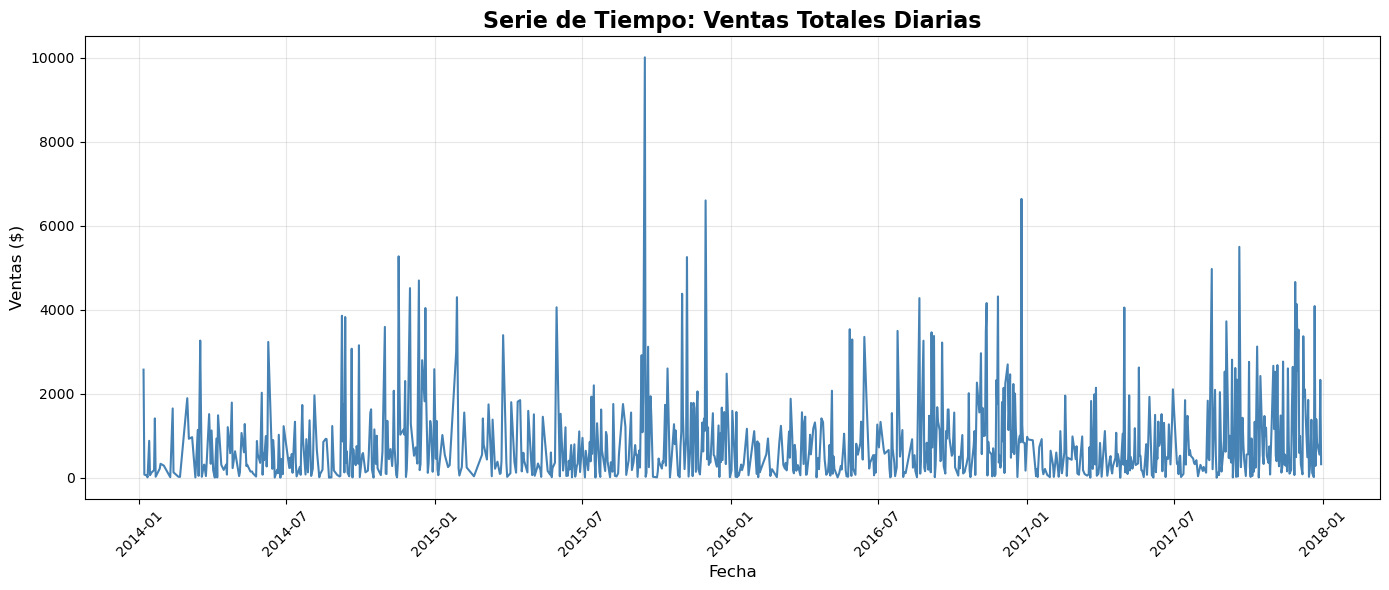

In [63]:
# Visualizacion de series de tiempo
print("\n=== SERIE DE TIEMPO DE VENTAS TOTALES ===")

# Agrupar ventas por fecha
ventas_diarias = paso8_visualization_data_stores_sales.groupby('Order Date')['Sales'].sum().sort_index()

# Crear la gráfica de serie temporal
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(ventas_diarias.index, ventas_diarias.values, linewidth=1.5, color='steelblue')
ax.set_title('Serie de Tiempo: Ventas Totales Diarias', fontsize=16, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Ventas ($)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> ##### b. Gráfico de barras comparando ventas por sucursal.


=== GRÁFICO DE BARRAS: VENTAS POR SUCURSAL ===


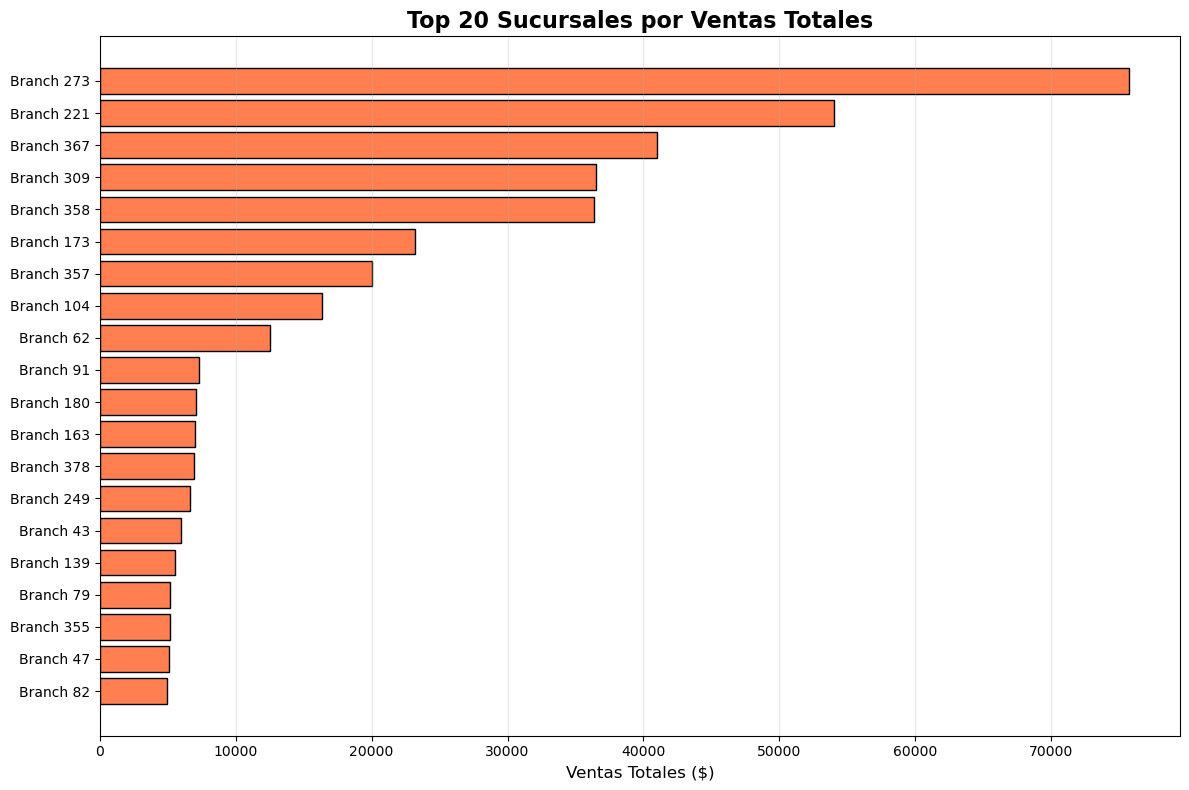

In [64]:
# Ventas por sucursal
print("\n=== GRÁFICO DE BARRAS: VENTAS POR SUCURSAL ===")

# Agrupar ventas totales por sucursal
ventas_por_sucursal = paso8_visualization_data_stores_sales.groupby('Branch')['Sales'].sum().sort_values(ascending=False)

# Seleccionar top 20 sucursales
top_20_sucursales = ventas_por_sucursal.head(20)

# Crear gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(range(len(top_20_sucursales)), top_20_sucursales.values, 
        color='coral', edgecolor='black')
ax.set_yticks(range(len(top_20_sucursales)))
ax.set_yticklabels(top_20_sucursales.index)
ax.set_xlabel('Ventas Totales ($)', fontsize=12)
ax.set_title('Top 20 Sucursales por Ventas Totales', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

> ##### c. Gráfico de barras comparando ventas por producto.


=== GRÁFICO DE BARRAS: VENTAS POR PRODUCTO ===


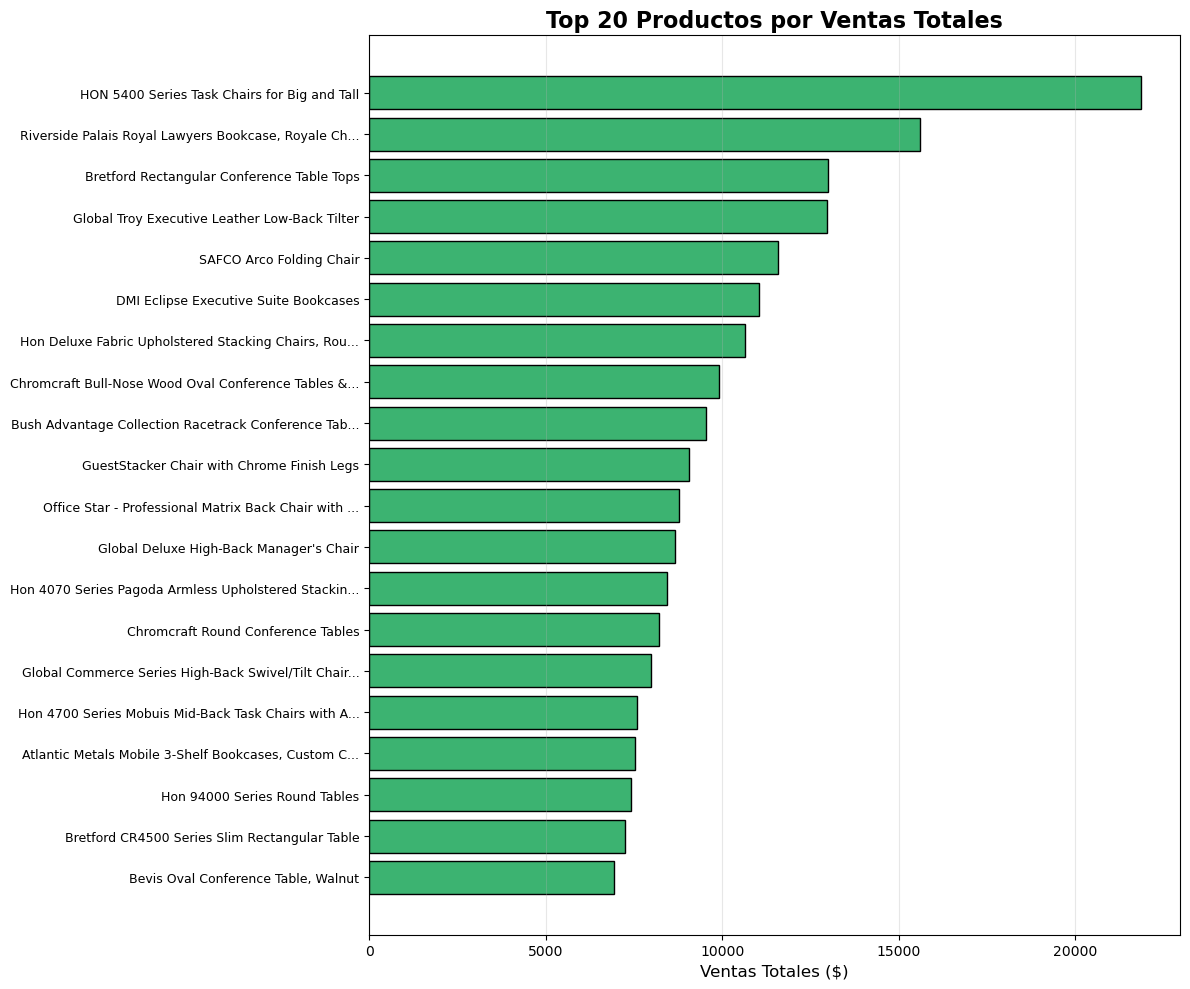

In [65]:
# Ventas por producto
print("\n=== GRÁFICO DE BARRAS: VENTAS POR PRODUCTO ===")

# Agrupar ventas totales por producto
ventas_por_producto = paso8_visualization_data_stores_sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Seleccionar top 20 productos
top_20_productos = ventas_por_producto.head(20)

# Crear gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(range(len(top_20_productos)), top_20_productos.values, 
        color='mediumseagreen', edgecolor='black')
ax.set_yticks(range(len(top_20_productos)))
# Truncar nombres largos para mejor visualización
nombres_truncados = [nombre[:50] + '...' if len(nombre) > 50 else nombre 
                     for nombre in top_20_productos.index]
ax.set_yticklabels(nombres_truncados, fontsize=9)
ax.set_xlabel('Ventas Totales ($)', fontsize=12)
ax.set_title('Top 20 Productos por Ventas Totales', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

> ##### d. Heatmap o matriz para visualizar comportamiento de ventas en el tiempo y por sucursal/producto.


=== HEATMAP: COMPORTAMIENTO DE VENTAS EN EL TIEMPO ===


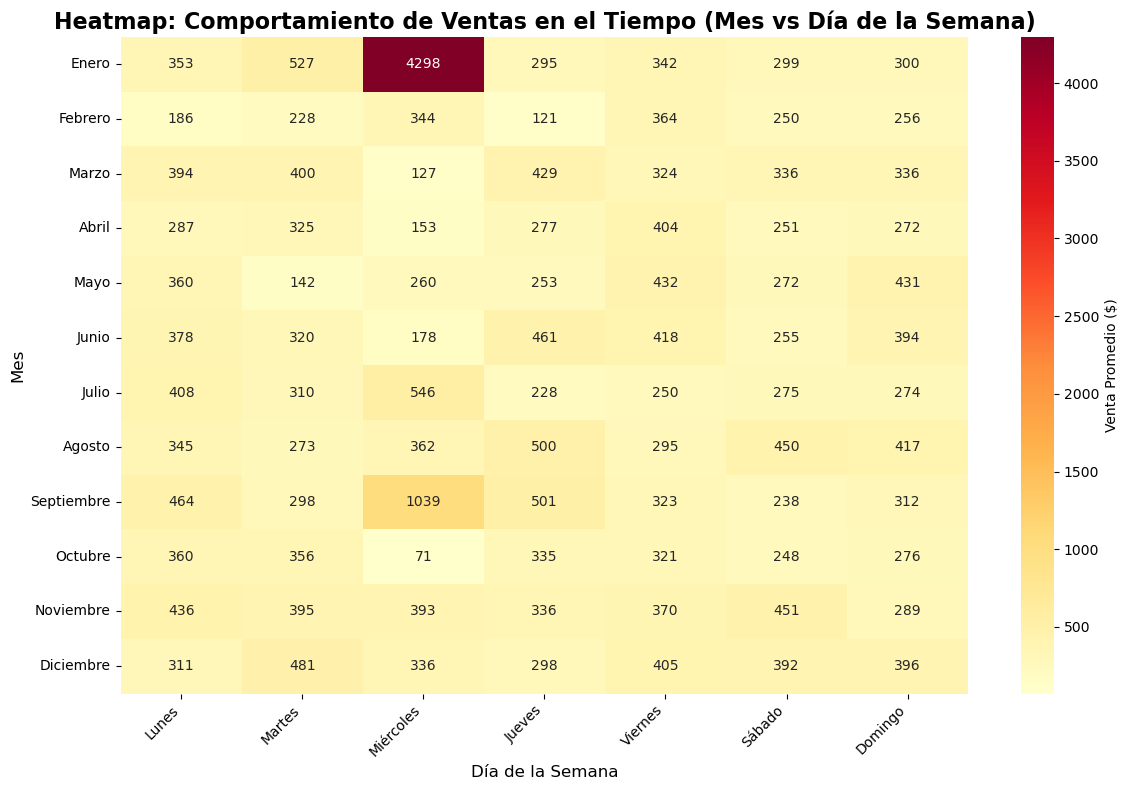

In [ ]:
# Heatmap o matriz para visualizar comportamiento de ventas en el tiempo
print("\n=== HEATMAP: COMPORTAMIENTO DE VENTAS EN EL TIEMPO ===")

# Asignar el dataframe
df_heatmap_ventas_tiempo = paso8_visualization_data_stores_sales.copy()

# Crear columnas temporales para el análisis
df_temp = df_heatmap_ventas_tiempo.copy()
df_temp['Mes'] = df_temp['Order Date'].dt.month
df_temp['Dia_Semana'] = df_temp['Order Date'].dt.dayofweek

# Crear matriz pivote: mes (filas) x día de la semana (columnas)
matriz_ventas_tiempo = df_temp.pivot_table(
    values='Sales',
    index='Mes',
    columns='Dia_Semana',
    aggfunc='mean',
    fill_value=0
)

# Nombres para los ejes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(matriz_ventas_tiempo, annot=True, fmt='.0f', 
            cmap='YlOrRd', cbar_kws={'label': 'Venta Promedio ($)'}, ax=ax)
ax.set_title('Heatmap: Comportamiento de Ventas en el Tiempo (Mes vs Día de la Semana)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Día de la Semana', fontsize=12)
ax.set_ylabel('Mes', fontsize=12)
ax.set_yticklabels(meses, rotation=0)
ax.set_xticklabels(dias, rotation=45, ha='right')
plt.tight_layout()
plt.show()


=== HEATMAP: VENTAS POR SUCURSAL Y CATEGORÍA DE PRODUCTO ===


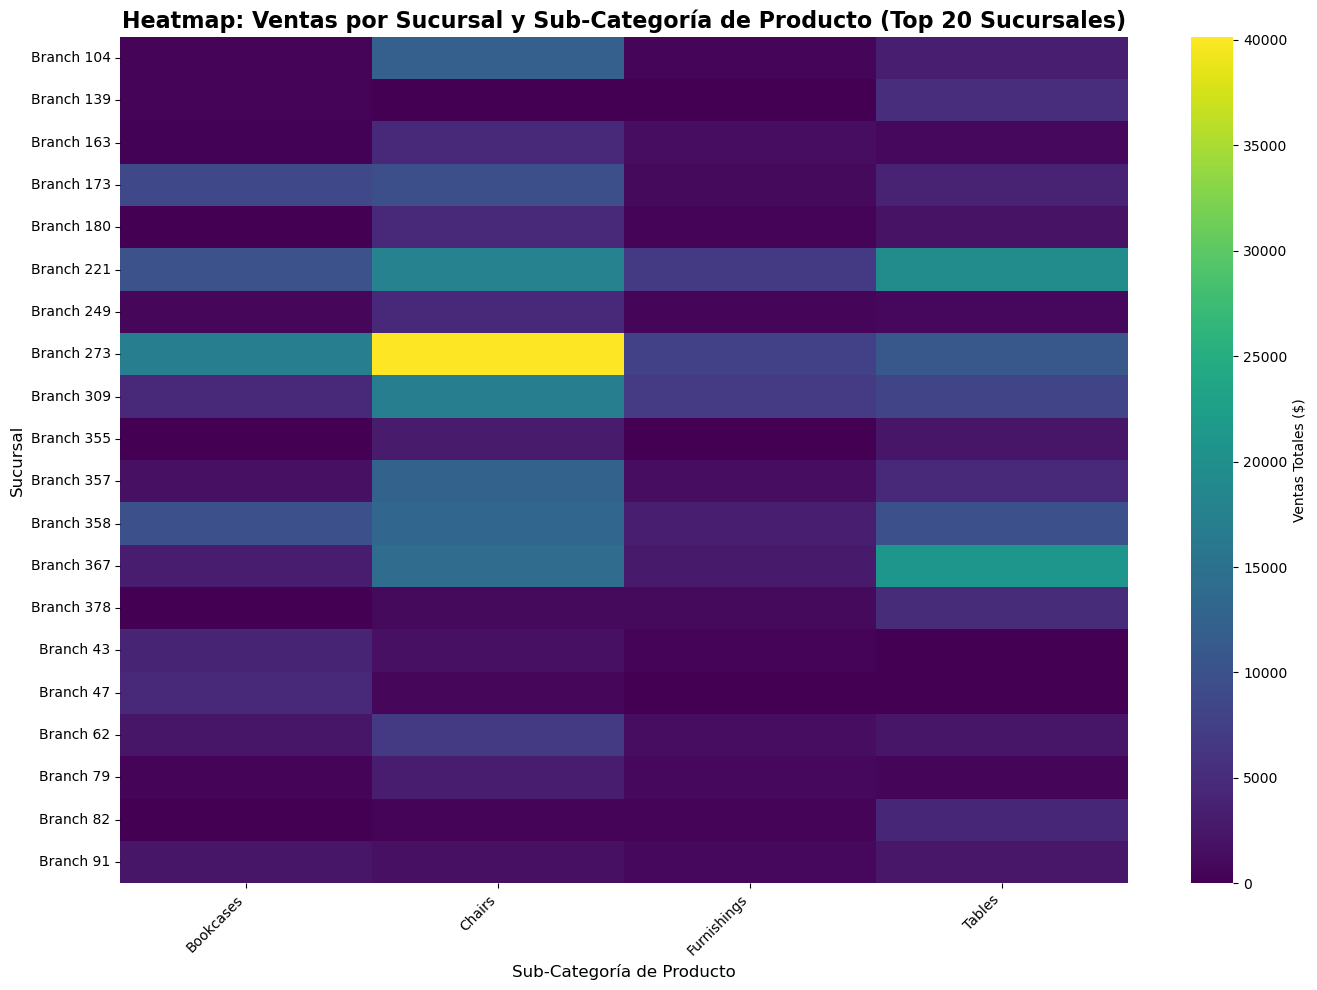

In [68]:
# Heatmap o matriz para visualizar comportamiento de ventas por sucursal/producto
print("\n=== HEATMAP: VENTAS POR SUCURSAL Y CATEGORÍA DE PRODUCTO ===")

# Asignar el dataframe
df_heatmap_sucursal_y_producto = paso8_visualization_data_stores_sales.copy()

# Seleccionar top 20 sucursales por ventas totales
top_20_branches = df_heatmap_sucursal_y_producto.groupby('Branch')['Sales'].sum().nlargest(20).index

# Filtrar datos solo para top 20 sucursales
df_top_branches = df_heatmap_sucursal_y_producto[df_heatmap_sucursal_y_producto['Branch'].isin(top_20_branches)].copy()

# Crear matriz pivote: sucursales (filas) x sub-categorías (columnas)
matriz_ventas_sucursal_producto = df_top_branches.pivot_table(
    values='Sales',
    index='Branch',
    columns='Sub-Category',
    aggfunc='sum',
    fill_value=0
)

# Crear heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(matriz_ventas_sucursal_producto, annot=False, fmt='.0f', 
            cmap='viridis', cbar_kws={'label': 'Ventas Totales ($)'}, ax=ax)
ax.set_title('Heatmap: Ventas por Sucursal y Sub-Categoría de Producto (Top 20 Sucursales)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Sub-Categoría de Producto', fontsize=12)
ax.set_ylabel('Sucursal', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--------------------

### 9. Series temporales

In [72]:
# Crear copia de dataset para no afectar cambios en la version del paso 8
paso9_series_data_stores_sales = paso8_visualization_data_stores_sales.copy()

> ##### (ventas totales, ventas por sucursal, ventas por producto y ventas por sucursal-producto)

> ##### a. Gráfico de Autocorrelación (ACF): muestra la dependencia entre la serie y sus rezagos.


=== ACF: VENTAS TOTALES ===


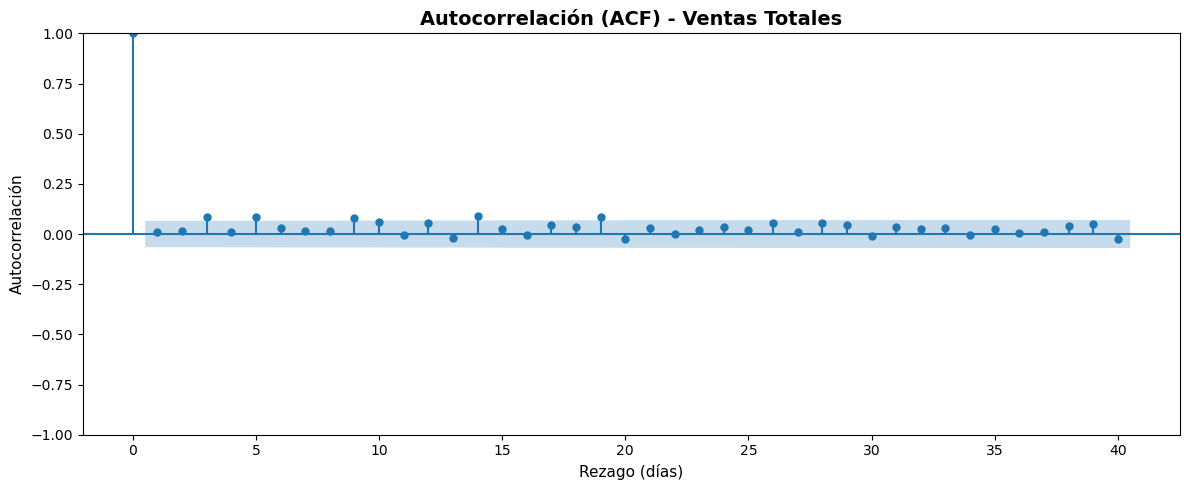


Interpretación:
  - Valores fuera del intervalo de confianza (líneas azules) son significativos
  - Patrones repetitivos indican estacionalidad


In [76]:
# ACF ventas totales
print("\n=== ACF: VENTAS TOTALES ===")

# Agrupar ventas totales por fecha
ventas_totales = paso9_series_data_stores_sales.groupby('Order Date')['Sales'].sum().sort_index()

# Crear gráfico ACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(ventas_totales, lags=40, ax=ax)
ax.set_title('Autocorrelación (ACF) - Ventas Totales', fontsize=14, fontweight='bold')
ax.set_xlabel('Rezago (días)', fontsize=11)
ax.set_ylabel('Autocorrelación', fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("  - Valores fuera del intervalo de confianza (líneas azules) son significativos")
print("  - Patrones repetitivos indican estacionalidad")


=== ACF: VENTAS POR SUCURSAL ===

Sucursal analizada: Branch 273 (sucursal con mayores ventas)


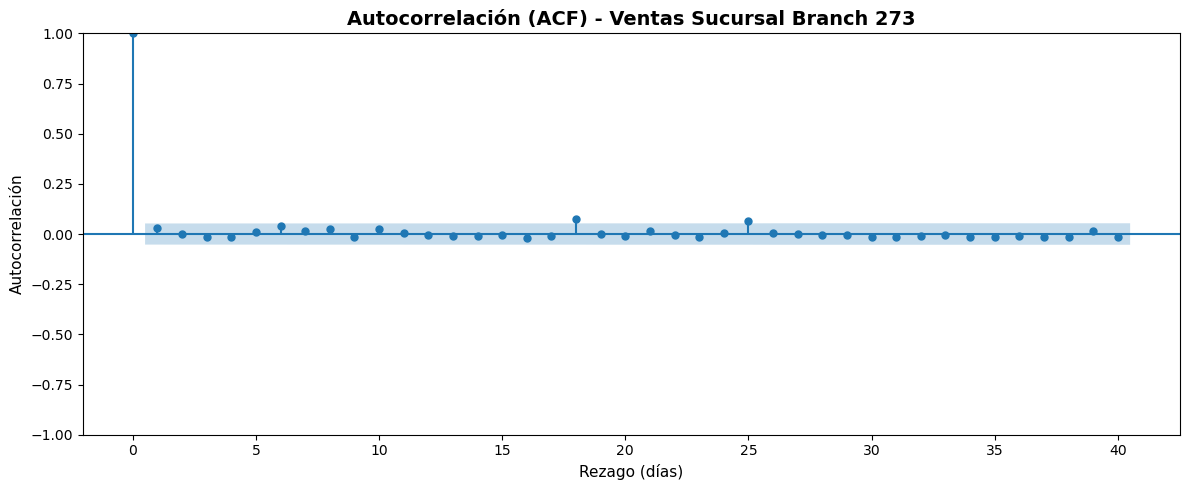


Interpretación:
  - Correlaciones significativas indican dependencia temporal en las ventas
  - Picos periódicos sugieren patrones estacionales


In [77]:
# ACF ventas por sucursal
print("\n=== ACF: VENTAS POR SUCURSAL ===")

# Identificar la sucursal con mayores ventas totales
top_sucursal = paso9_series_data_stores_sales.groupby('Branch')['Sales'].sum().idxmax()
print(f"\nSucursal analizada: {top_sucursal} (sucursal con mayores ventas)")

# Filtrar datos de la sucursal principal
df_top_sucursal = paso9_series_data_stores_sales[paso9_series_data_stores_sales['Branch'] == top_sucursal]

# Agrupar ventas por fecha para esta sucursal
ventas_por_sucursal = df_top_sucursal.groupby('Order Date')['Sales'].sum().sort_index()

# Rellenar fechas faltantes con cero para tener serie continua
fecha_min = ventas_por_sucursal.index.min()
fecha_max = ventas_por_sucursal.index.max()
rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
ventas_por_sucursal = ventas_por_sucursal.reindex(rango_fechas, fill_value=0)

# Crear gráfico ACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(ventas_por_sucursal, lags=40, ax=ax)
ax.set_title(f'Autocorrelación (ACF) - Ventas Sucursal {top_sucursal}', fontsize=14, fontweight='bold')
ax.set_xlabel('Rezago (días)', fontsize=11)
ax.set_ylabel('Autocorrelación', fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("  - Correlaciones significativas indican dependencia temporal en las ventas")
print("  - Picos periódicos sugieren patrones estacionales")


=== ACF: VENTAS POR PRODUCTO ===

Producto analizado: HON 5400 Series Task Chairs for Big and Tall


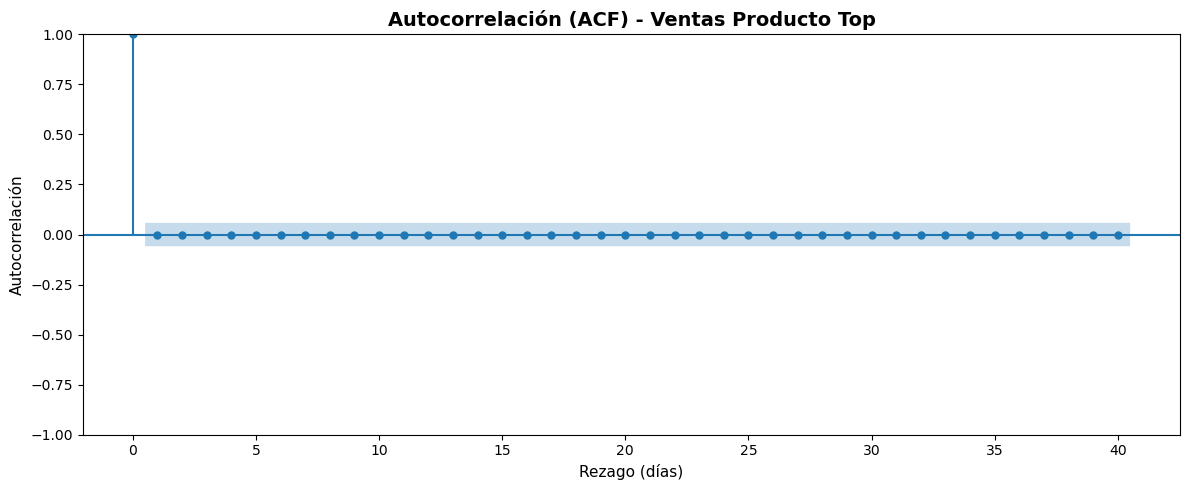


Interpretación:
  - Las series de productos individuales pueden tener más variabilidad
  - Correlaciones significativas indican patrones de compra recurrentes


In [78]:
# ACF ventas por producto
print("\n=== ACF: VENTAS POR PRODUCTO ===")

# Identificar el producto con mayores ventas totales
top_producto = paso9_series_data_stores_sales.groupby('Product Name')['Sales'].sum().idxmax()
print(f"\nProducto analizado: {top_producto}")

# Filtrar datos del producto principal
df_top_producto = paso9_series_data_stores_sales[paso9_series_data_stores_sales['Product Name'] == top_producto]

# Agrupar ventas por fecha para este producto
ventas_por_producto = df_top_producto.groupby('Order Date')['Sales'].sum().sort_index()

# Rellenar fechas faltantes con cero
fecha_min = ventas_por_producto.index.min()
fecha_max = ventas_por_producto.index.max()
rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
ventas_por_producto = ventas_por_producto.reindex(rango_fechas, fill_value=0)

# Crear gráfico ACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(ventas_por_producto, lags=40, ax=ax)
ax.set_title(f'Autocorrelación (ACF) - Ventas Producto Top', fontsize=14, fontweight='bold')
ax.set_xlabel('Rezago (días)', fontsize=11)
ax.set_ylabel('Autocorrelación', fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("  - Las series de productos individuales pueden tener más variabilidad")
print("  - Correlaciones significativas indican patrones de compra recurrentes")

In [81]:
# ACF ventas por sucursal-producto
print("\n=== ACF: VENTAS POR SUCURSAL-PRODUCTO ===")

# Identificar la combinación sucursal-producto con mayores ventas
ventas_sucursal_producto = paso9_series_data_stores_sales.groupby(['Branch', 'Product Name'])['Sales'].sum().sort_values(ascending=False)
top_combinacion = ventas_sucursal_producto.index[0]
top_branch, top_product = top_combinacion

print(f"\nCombinación analizada:")
print(f"  - Sucursal: {top_branch}")
print(f"  - Producto: {top_product[:50]}...")

# Filtrar datos de la combinación específica
df_combinacion = paso9_series_data_stores_sales[(paso9_series_data_stores_sales['Branch'] == top_branch) & (paso9_series_data_stores_sales['Product Name'] == top_product)]

# Agrupar ventas por fecha para esta combinación
ventas_combinacion = df_combinacion.groupby('Order Date')['Sales'].sum().sort_index()

# Rellenar fechas faltantes con cero
fecha_min = ventas_combinacion.index.min()
fecha_max = ventas_combinacion.index.max()
rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
ventas_combinacion = ventas_combinacion.reindex(rango_fechas, fill_value=0)

# Validar que haya suficientes datos para el análisis ACF
n_observaciones = len(ventas_combinacion)
print(f"\nNúmero de observaciones en la serie: {n_observaciones}")

# Ajustar el número de lags según las observaciones disponibles
max_lags = min(40, n_observaciones // 2 - 1)

# Validacion de cantidad de datos
if max_lags < 10:
    print("\nAdvertencia: No hay suficientes datos para un análisis ACF confiable.")
    print("Se requieren al menos 20 observaciones para calcular ACF con 10 lags.")
else:
    # Crear gráfico ACF
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_acf(ventas_combinacion, lags=max_lags, ax=ax)
    ax.set_title(f'Autocorrelación (ACF) - Ventas Sucursal-Producto', fontsize=14, fontweight='bold')
    ax.set_xlabel('Rezago (días)', fontsize=11)
    ax.set_ylabel('Autocorrelación', fontsize=11)
    plt.tight_layout()
    plt.show()

    print("\nInterpretación:")
    print("  - Combinaciones específicas pueden mostrar patrones más irregulares")
    print("  - Útil para identificar comportamientos de compra localizados")


=== ACF: VENTAS POR SUCURSAL-PRODUCTO ===

Combinación analizada:
  - Sucursal: Branch 309
  - Producto: HON 5400 Series Task Chairs for Big and Tall...

Número de observaciones en la serie: 1

Advertencia: No hay suficientes datos para un análisis ACF confiable.
Se requieren al menos 20 observaciones para calcular ACF con 10 lags.


> ##### b. Gráfico de Autocorrelación Parcial (PACF): ayuda a identificar la cantidad de términos AR (autoregresivos) que deben incluirse.


=== PACF: VENTAS TOTALES ===


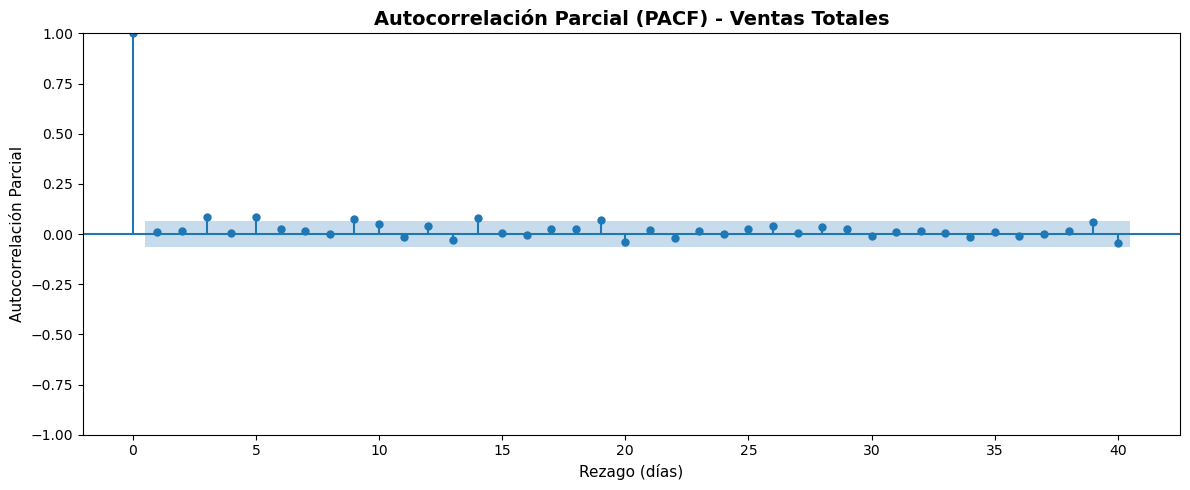


Interpretación:
  - PACF muestra correlaciones directas eliminando efectos indirectos
  - Ayuda a identificar el orden AR en modelos ARIMA


In [85]:
# PACF ventas totales
print("\n=== PACF: VENTAS TOTALES ===")

# Usar la serie de ventas totales calculada anteriormente
# Si no existe, recalcular
if 'ventas_totales' not in locals():
    ventas_totales = paso9_series_data_stores_sales.groupby('Order Date')['Sales'].sum().sort_index()

# Crear gráfico PACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_totales, lags=40, ax=ax, method='ywm')
ax.set_title('Autocorrelación Parcial (PACF) - Ventas Totales', fontsize=14, fontweight='bold')
ax.set_xlabel('Rezago (días)', fontsize=11)
ax.set_ylabel('Autocorrelación Parcial', fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("  - PACF muestra correlaciones directas eliminando efectos indirectos")
print("  - Ayuda a identificar el orden AR en modelos ARIMA")


=== PACF: VENTAS POR SUCURSAL ===

Sucursal analizada: Branch 273


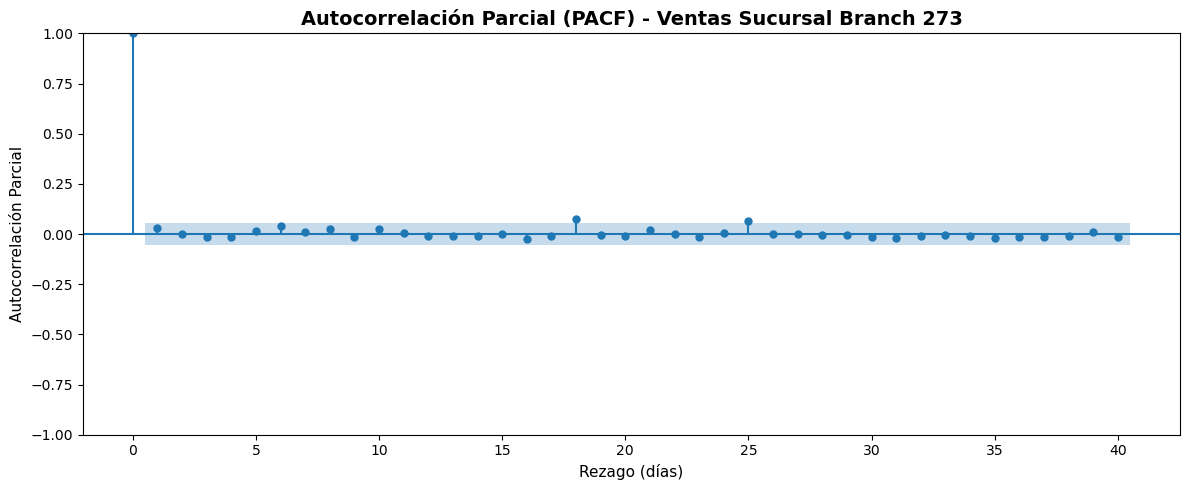


Interpretación:
  - Identifica términos AR necesarios para modelar la serie
  - Valores significativos indican dependencia directa


In [84]:
# PACF ventas por sucursal
print("\n=== PACF: VENTAS POR SUCURSAL ===")

# Usar la serie de ventas por sucursal calculada anteriormente
# Si no existe, recalcular
if 'ventas_por_sucursal' not in locals():
    top_sucursal = paso9_series_data_stores_sales.groupby('Branch')['Sales'].sum().idxmax()
    df_top_sucursal = paso9_series_data_stores_sales[paso9_series_data_stores_sales['Branch'] == top_sucursal]
    ventas_por_sucursal = df_top_sucursal.groupby('Order Date')['Sales'].sum().sort_index()
    fecha_min = ventas_por_sucursal.index.min()
    fecha_max = ventas_por_sucursal.index.max()
    rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
    ventas_por_sucursal = ventas_por_sucursal.reindex(rango_fechas, fill_value=0)

print(f"\nSucursal analizada: {top_sucursal}")

# Crear gráfico PACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_por_sucursal, lags=40, ax=ax, method='ywm')
ax.set_title(f'Autocorrelación Parcial (PACF) - Ventas Sucursal {top_sucursal}', fontsize=14, fontweight='bold')
ax.set_xlabel('Rezago (días)', fontsize=11)
ax.set_ylabel('Autocorrelación Parcial', fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("  - Identifica términos AR necesarios para modelar la serie")
print("  - Valores significativos indican dependencia directa")


=== PACF: VENTAS POR PRODUCTO ===

Producto analizado: HON 5400 Series Task Chairs for Big and Tall


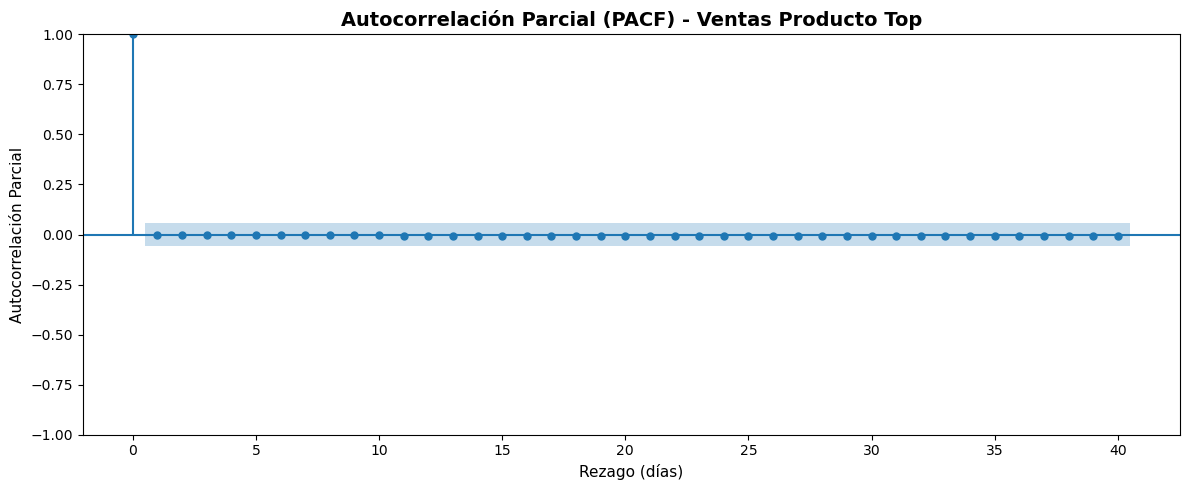


Interpretación:
  - Ayuda a determinar componentes autoregresivos del producto
  - Útil para predecir demanda futura


In [83]:
# PACF ventas por producto
print("\n=== PACF: VENTAS POR PRODUCTO ===")

# Usar la serie de ventas por producto calculada anteriormente
# Si no existe, recalcular
if 'ventas_por_producto' not in locals():
    top_producto = paso9_series_data_stores_sales.groupby('Product Name')['Sales'].sum().idxmax()
    df_top_producto = paso9_series_data_stores_sales[paso9_series_data_stores_sales['Product Name'] == top_producto]
    ventas_por_producto = df_top_producto.groupby('Order Date')['Sales'].sum().sort_index()
    fecha_min = ventas_por_producto.index.min()
    fecha_max = ventas_por_producto.index.max()
    rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
    ventas_por_producto = ventas_por_producto.reindex(rango_fechas, fill_value=0)

print(f"\nProducto analizado: {top_producto}")

# Crear gráfico PACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_por_producto, lags=40, ax=ax, method='ywm')
ax.set_title(f'Autocorrelación Parcial (PACF) - Ventas Producto Top', fontsize=14, fontweight='bold')
ax.set_xlabel('Rezago (días)', fontsize=11)
ax.set_ylabel('Autocorrelación Parcial', fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
print("  - Ayuda a determinar componentes autoregresivos del producto")
print("  - Útil para predecir demanda futura")

In [82]:
# PACF ventas por sucursal-producto
print("\n=== PACF: VENTAS POR SUCURSAL-PRODUCTO ===")

# Usar la serie de ventas por combinación calculada anteriormente
# Si no existe, recalcular
if 'ventas_combinacion' not in locals():
    ventas_sucursal_producto = paso9_series_data_stores_sales.groupby(['Branch', 'Product Name'])['Sales'].sum().sort_values(ascending=False)
    top_combinacion = ventas_sucursal_producto.index[0]
    top_branch, top_product = top_combinacion
    df_combinacion = paso9_series_data_stores_sales[(paso9_series_data_stores_sales['Branch'] == top_branch) & (paso9_series_data_stores_sales['Product Name'] == top_product)]
    ventas_combinacion = df_combinacion.groupby('Order Date')['Sales'].sum().sort_index()
    fecha_min = ventas_combinacion.index.min()
    fecha_max = ventas_combinacion.index.max()
    rango_fechas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
    ventas_combinacion = ventas_combinacion.reindex(rango_fechas, fill_value=0)

print(f"\nCombinación analizada:")
print(f"  - Sucursal: {top_branch}")
print(f"  - Producto: {top_product[:50]}...")

# Validar que haya suficientes datos para el análisis PACF
n_observaciones = len(ventas_combinacion)
print(f"\nNúmero de observaciones en la serie: {n_observaciones}")

# Ajustar el número de lags según las observaciones disponibles
max_lags = min(40, n_observaciones // 2 - 1)

if max_lags < 10:
    print("\nAdvertencia: No hay suficientes datos para un análisis PACF confiable.")
    print("Se requieren al menos 20 observaciones para calcular PACF con 10 lags.")
else:
    # Crear gráfico PACF
    fig, ax = plt.subplots(figsize=(12, 5))
    plot_pacf(ventas_combinacion, lags=max_lags, ax=ax, method='ywm')
    ax.set_title(f'Autocorrelación Parcial (PACF) - Ventas Sucursal-Producto', fontsize=14, fontweight='bold')
    ax.set_xlabel('Rezago (días)', fontsize=11)
    ax.set_ylabel('Autocorrelación Parcial', fontsize=11)
    plt.tight_layout()
    plt.show()

    print("\nInterpretación:")
    print("  - Análisis detallado para combinaciones específicas")
    print("  - Permite forecasting a nivel granular")


=== PACF: VENTAS POR SUCURSAL-PRODUCTO ===

Combinación analizada:
  - Sucursal: Branch 309
  - Producto: HON 5400 Series Task Chairs for Big and Tall...

Número de observaciones en la serie: 1

Advertencia: No hay suficientes datos para un análisis PACF confiable.
Se requieren al menos 20 observaciones para calcular PACF con 10 lags.


> ##### c. Interpretación

i. ¿Existen correlaciones significativas a diferentes rezagos?

Para ventas totales se considera que el ACF existen algunas correlaciones significativas débiles en los primeros rezagos (lag 3, 5, 10, 15, 20), aunque son marginales y cercanas a las bandas de confianza. Mientras que para PACF las correlaciones parciales son muy débiles, con pequeños picos dispersos que apenas superan las bandas de confianza.

Para las ventas por sucursal se visualiza que en ACF algunos picos aislados en lag 19 y 26, pero no son consistentemente significativos. Mientras que en PACF prácticamente todas las correlaciones están dentro de las bandas de confianza. Por lo tanto, hay correlaciones mínima, sin un patrón claro de dependencia temporal.

Para ventas por producto en ACF la autocorrelación decae rápidamente a cero después del lag 0. Todos los valores están dentro de las bandas de confianza. Mientras que en PACF no hay correlaciones parciales significativas. Por lo tanto, no existen correlaciones significativas. La serie es altamente irregular.

Finalmente para ventas por Sucursal-Producto se requieren más datos pues actualmente se tiene solamente 1 por lo que los datos son insuficientes para análisis confiable.


ii. ¿Se observa estacionalidad reflejada en patrones repetitivos?

En el caso de ventas totales no se observa estacionalidad clara. Los picos en ACF son irregulares y no siguen un patrón repetitivo a intervalos constantes (como cada 7, 30 o 365 días).

Las ventas por sucursal tampoco se observa estacionalidad. Los picos aislados en lag 19 y 26 no forman un patrón consistente y repetitivo.

En ventas por producto, no se observa estacionalidad. La serie muestra alta variabilidad sin componentes estacionales detectables.

--------------------

### 10. Insights y conclusiones del EDA

> ##### a. Identificar variables que afectan directamente las ventas.

Las variables "Sales" y "Profit" tienen una media mucho menor que el valor máximo, indicando la posible presencia de valores extremos o outliers.

La desviación estándar "std" alta en ventas y ganancias también claramente indica alta variabilidad.

El mínimo negativo en Profit (-1862.31) indica pérdidas en algunas transacciones.

El descuento tiene una media de 0.17 con un máximo de 0.7, sugiriendo que no todos los productos tienen descuento y que éste puede llegar hasta el 70%.

La cantidad (Quantity) tiene variabilidad más baja, con un rango de 1 a 14 unidades.

> ##### b. Detectar patrones útiles para el modelo de forecasting.

Aplicación en forecasting:
   - Series con correlaciones significativas son más predecibles
   - Patrones estacionales deben incorporarse en los modelos
   - La ausencia de correlaciones sugiere alta aleatoriedad

De acuerdo al análisis realizado pueden exitir implicaciones importantes por la ausencia de correlaciones significativas, pues los modelos simples pueden no ser efectivos. La falta de estacionalidad sugiere que no es necesario incluir componentes estacionales en los modelos iniciales.

> ##### c. Concluir sobre la calidad y preparación del dataset para las etapas siguientes del proyecto.

Estado: Sin estacionalidad detectada

Ventajas:

- Modelos más simples y rápidos de entrenar
- Menos parámetros que ajustar
- Menor riesgo de sobreajuste
- Interpretación más directa

Desventajas:

- Puede indicar que las ventas son muy irregulares
- Dificulta la predicción a largo plazo
- Sugiere alta influencia de factores externos no capturados

Modelos a considerar:

- ARIMA simple (sin componente estacional)
- Modelos de suavizado exponencial (Exponential Smoothing)
- Modelos de machine learning (Random Forest, XGBoost, LSTM)